In [85]:
# Libary inmports
import self_made_functions as smf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap # Wrap text for long titles

# Load original dataset
df_assessment, wv_path = smf.get_correct_df()

## <b><span style="color:#D65DB1"> Transcription of one word </span></b>
<!-- <b><span style="color:#d65db1"> d65db1 </span></b> -->
<!-- <b><span style="color:#da6db9"> da6db9 </span></b> -->
<b><span style="color:#de7dc1"> de7dc1 </span></b>
<b><span style="color:#e28ec8"> e28ec8 </span></b>
<b><span style="color:#e69ed0"> e69ed0 </span></b>
<b><span style="color:#ebaed8"> ebaed8 </span></b>
<b><span style="color:#efbee0"> efbee0 </span></b>

Split the results into the score categories, and focus on <b><span style="color:#d65db1">version 1</span></b> in the first instance

## <b><span style="color:#FF9671"> Concatenated audio </span></b>

The concatenated audio did not have any completely empty transcriptions, but it did have some transcriptions with very few or many words. 


<b><span style="color:#ff9671">ff9671</span></b>
<b><span style="color:#ff9f7b">ff9f7b</span></b>
<b><span style="color:#ffa885">ffa885</span></b>
<b><span style="color:#ffb28f">ffb28f</span></b>
<b><span style="color:#ffb999">ffb999</span></b>
<b><span style="color:#ffc2a3">ffc2a3</span></b>
<b><span style="color:#ffccad">ffccad</span></b>

tiny
tiny__concatenated_audio_information_scores_id_sorted_v1.csv


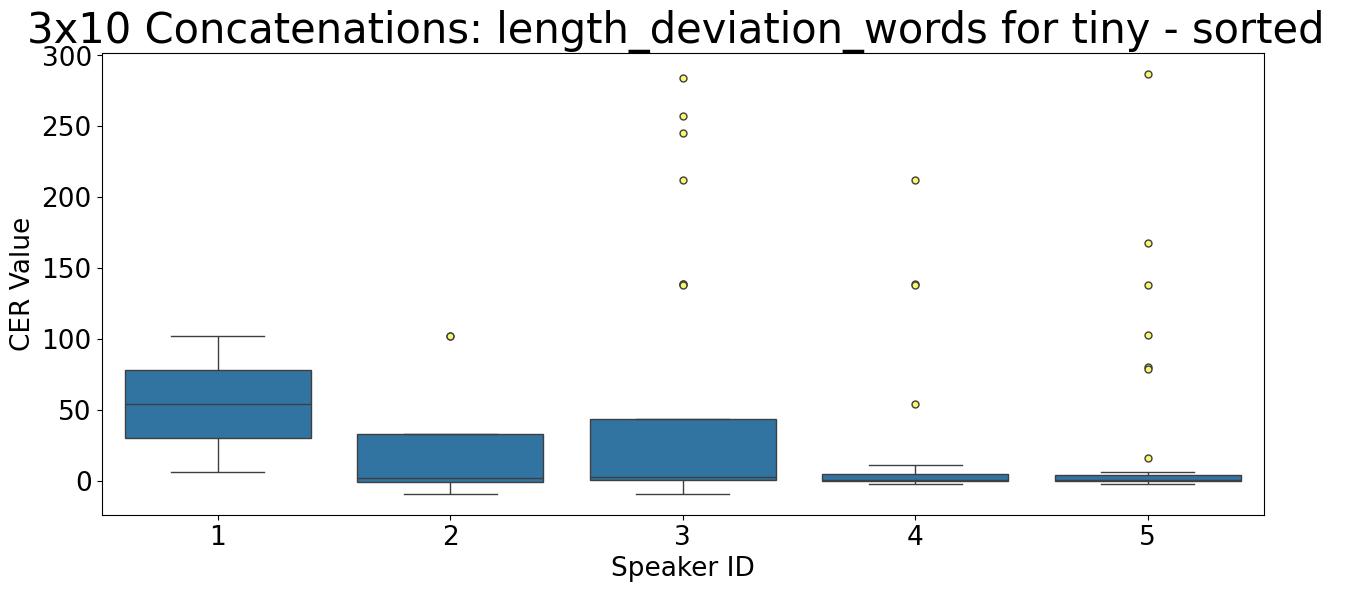

tiny
tiny__concatenated_audio_information_scores_id_mixed_v1.csv


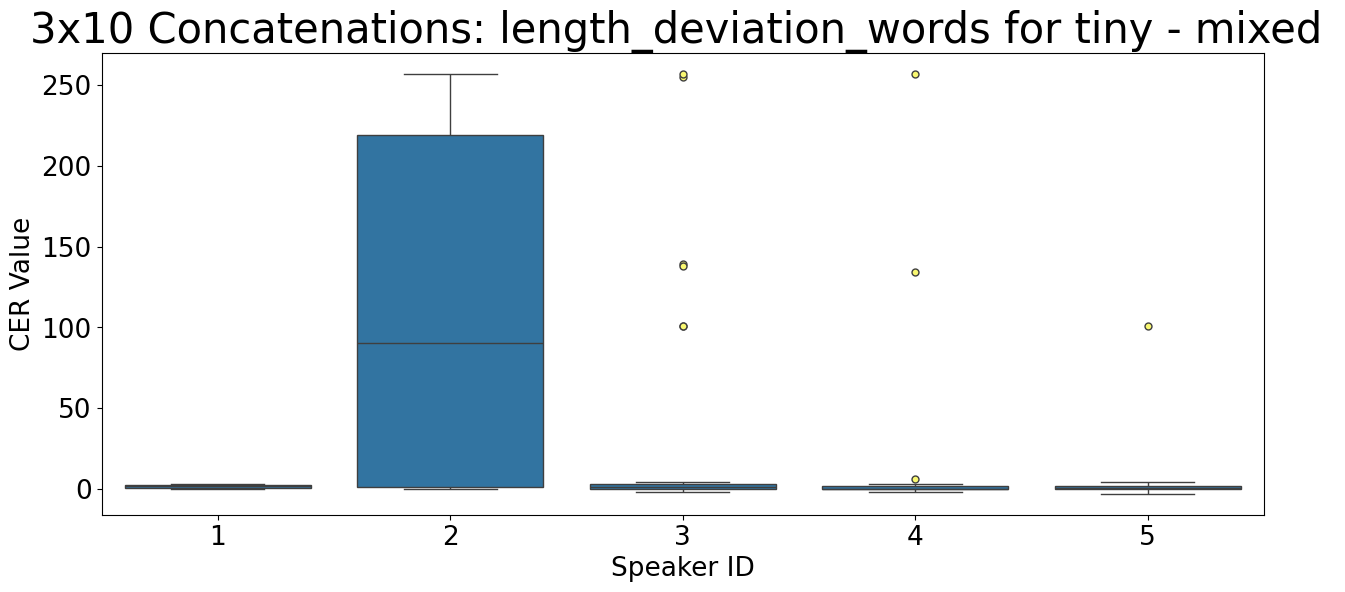

nb-whisper-tiny
nb-whisper-tiny__concatenated_audio_information_scores_id_sorted_v1.csv


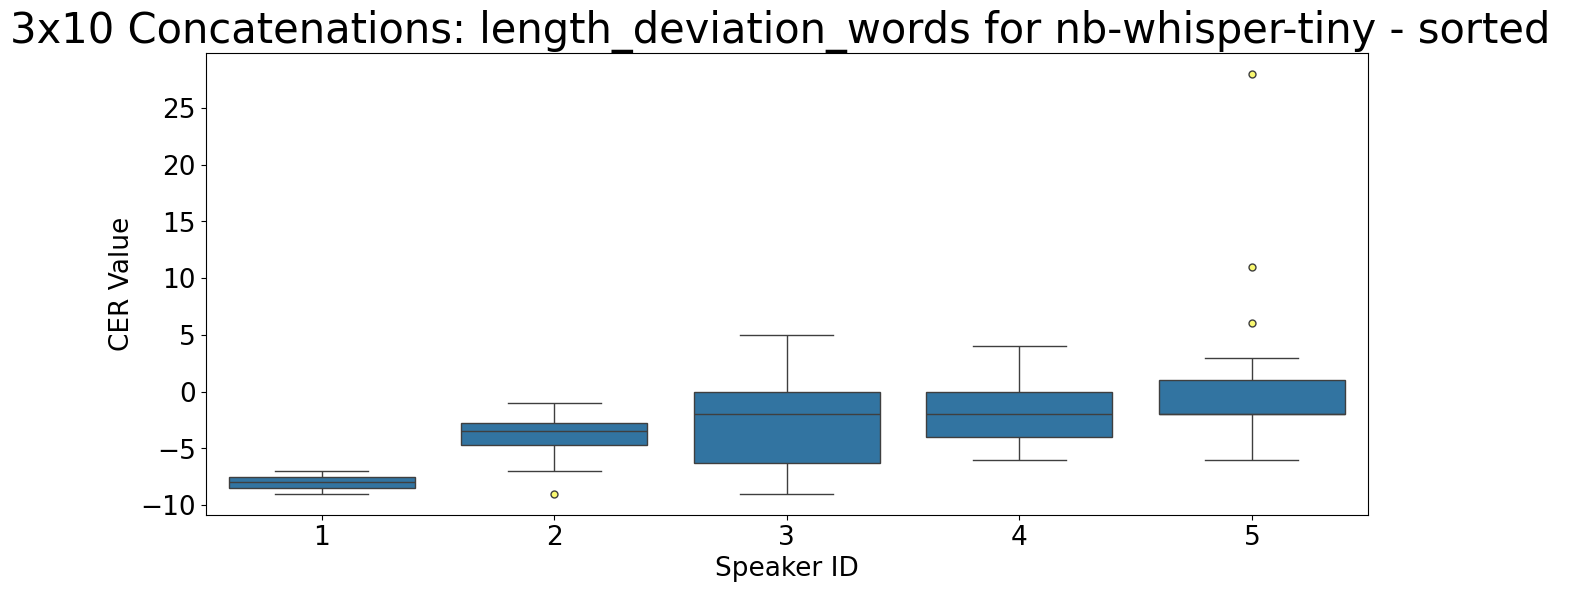

nb-whisper-tiny
nb-whisper-tiny__concatenated_audio_information_scores_id_mixed_v1.csv


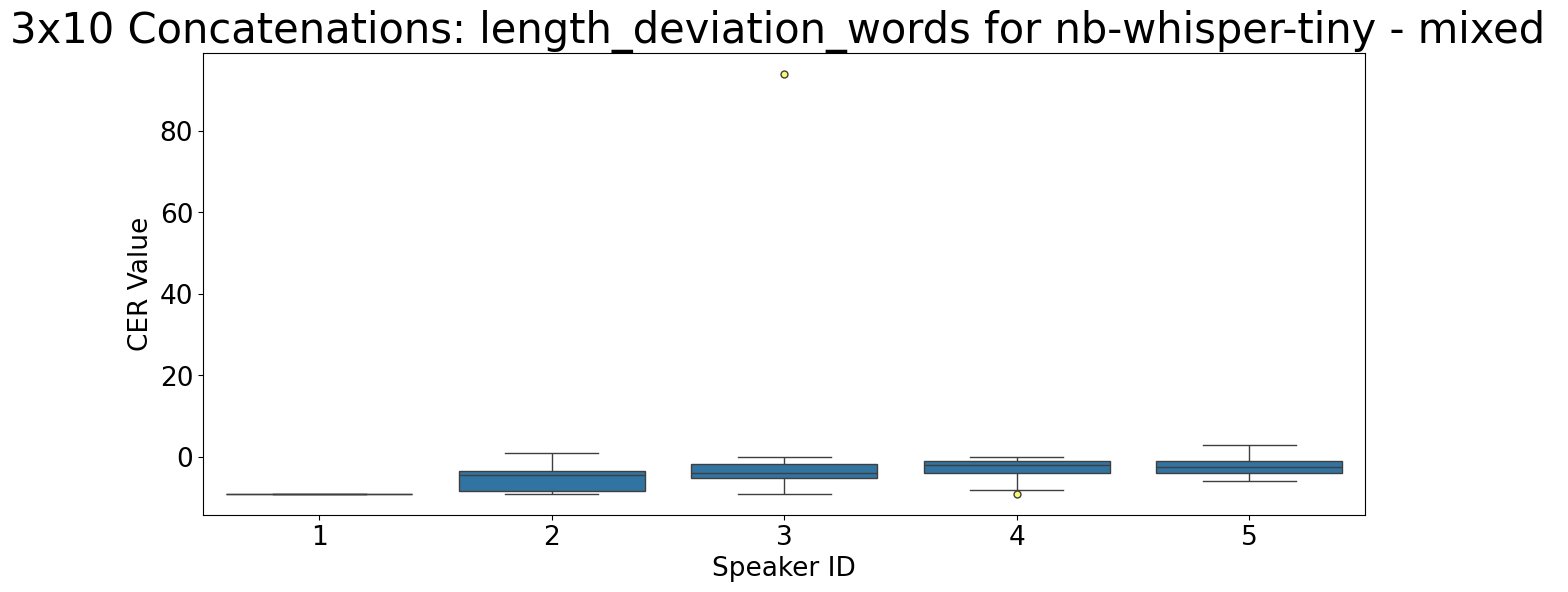

nb-whisper-tiny-verbatim
nb-whisper-tiny-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv


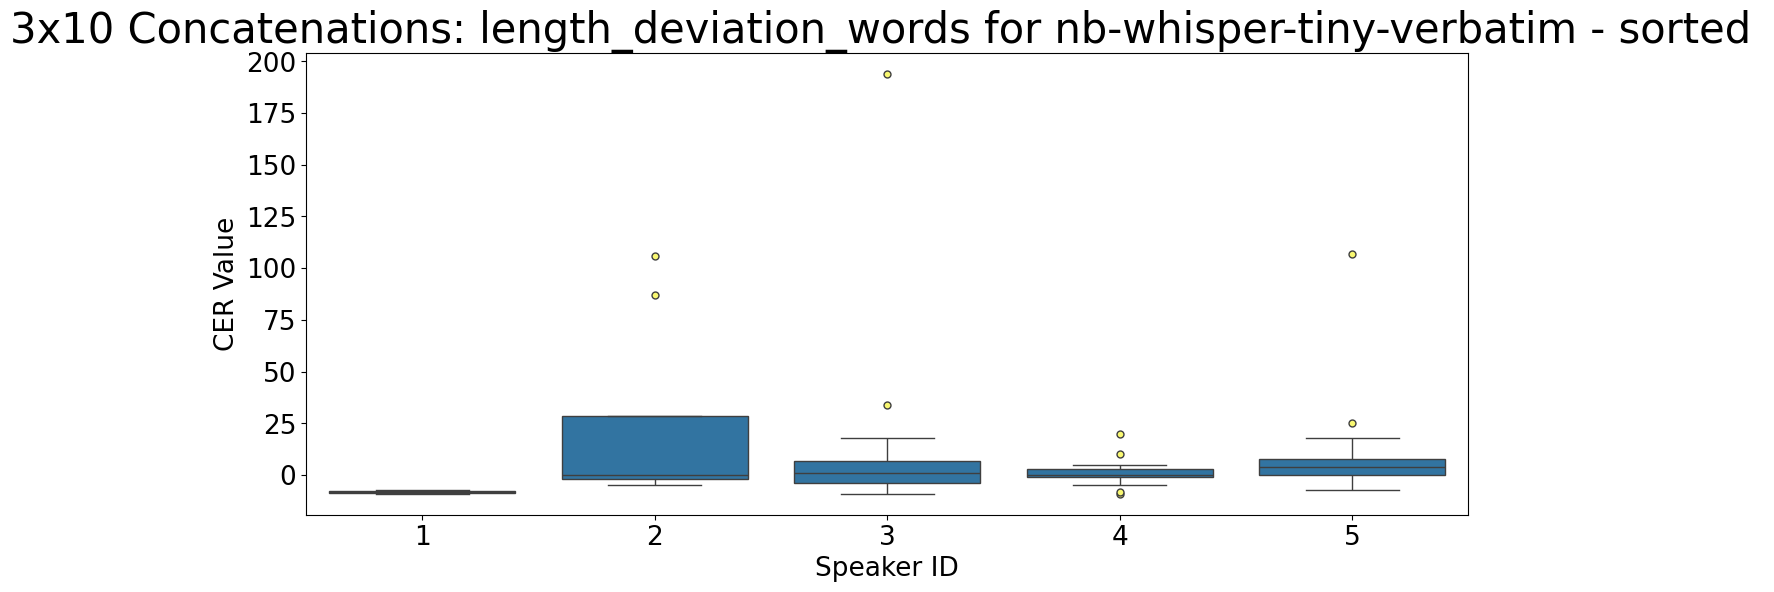

nb-whisper-tiny-verbatim
nb-whisper-tiny-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv


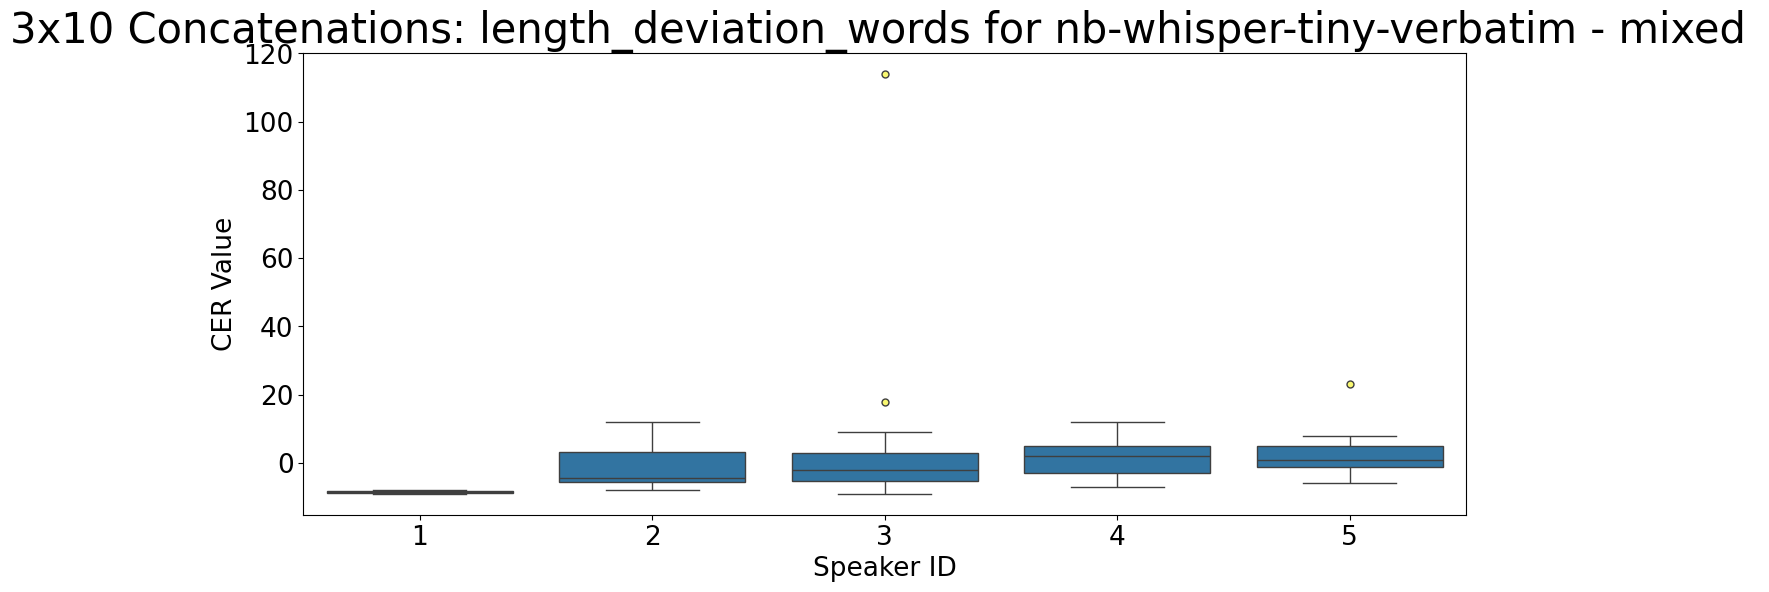

base
base__concatenated_audio_information_scores_id_sorted_v1.csv


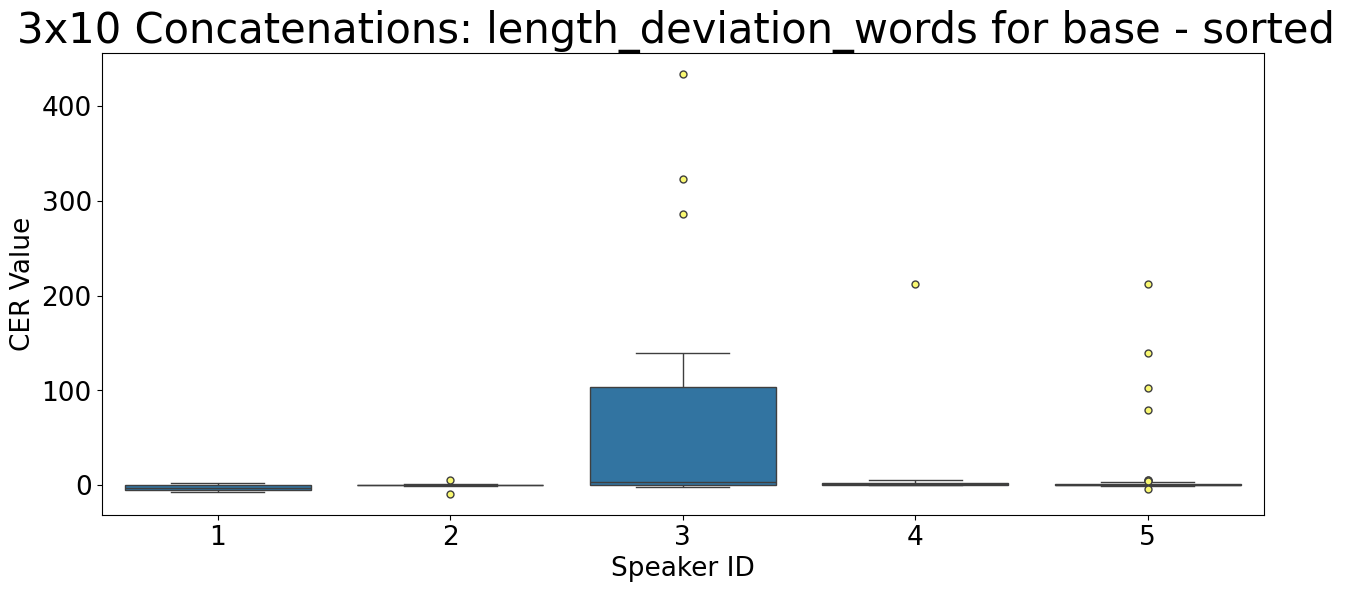

base
base__concatenated_audio_information_scores_id_mixed_v1.csv


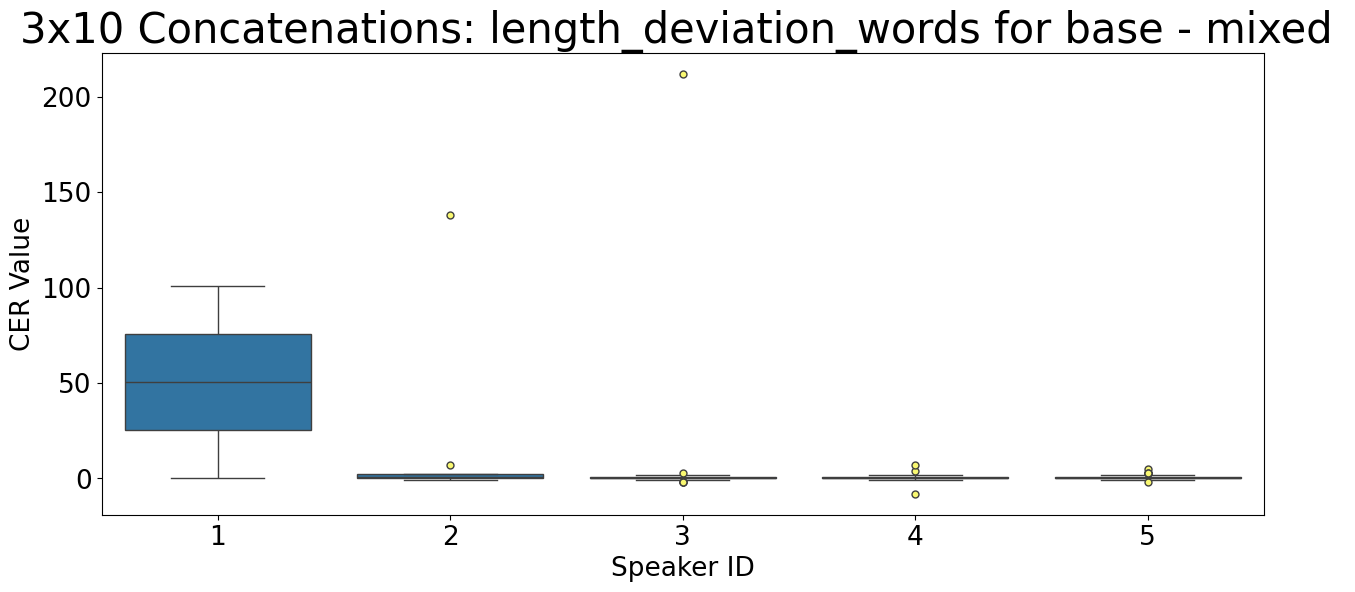

nb-whisper-base
nb-whisper-base__concatenated_audio_information_scores_id_sorted_v1.csv


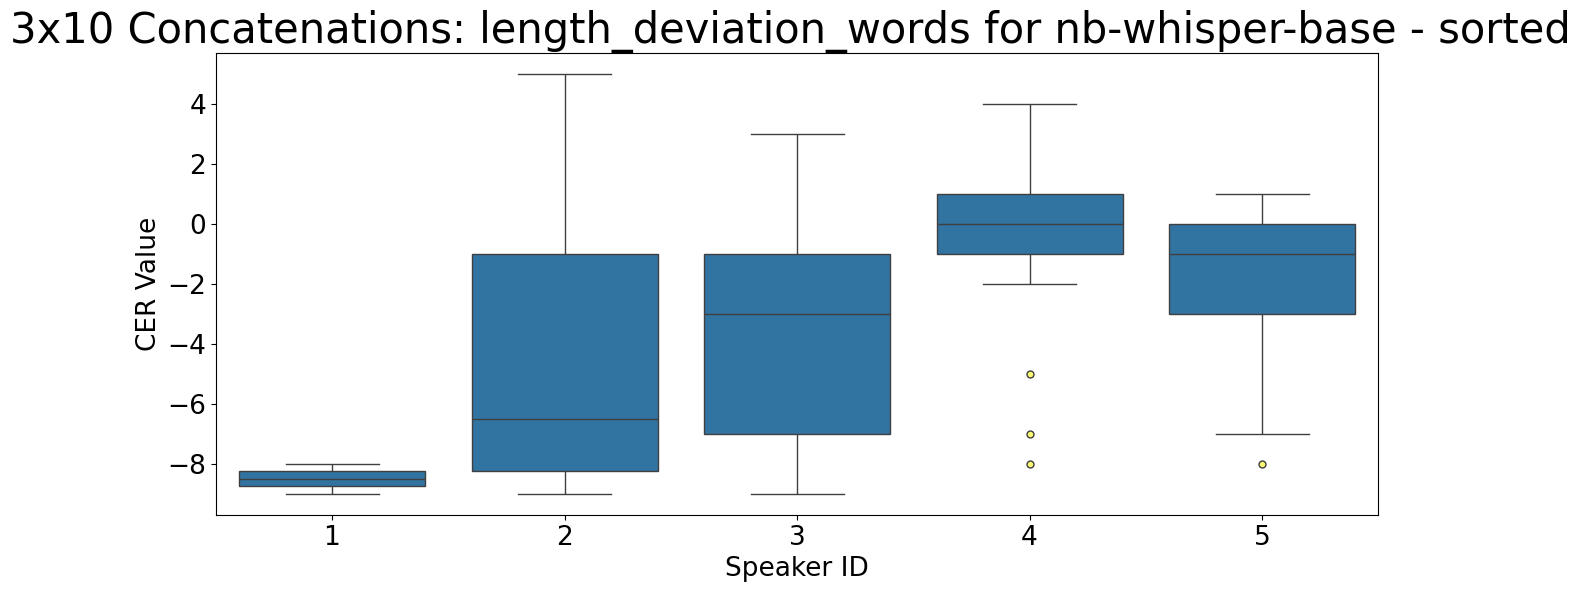

nb-whisper-base
nb-whisper-base__concatenated_audio_information_scores_id_mixed_v1.csv


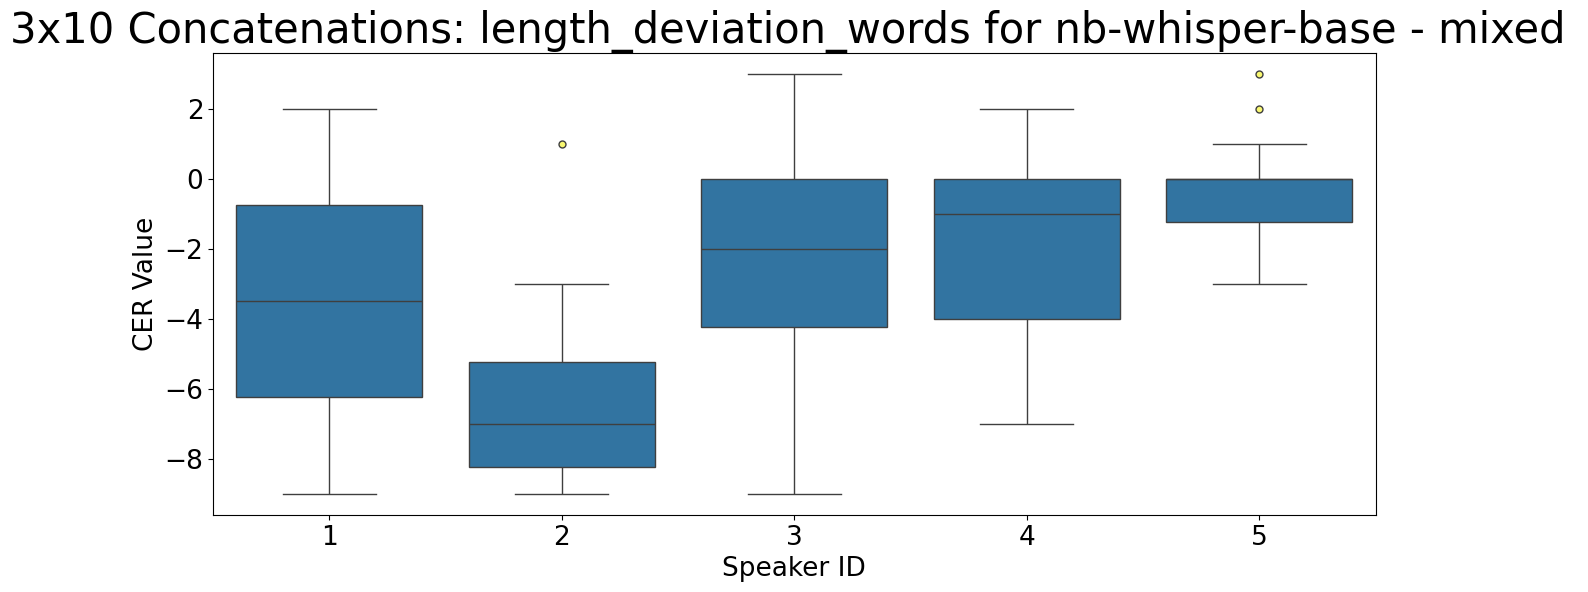

nb-whisper-base-verbatim
nb-whisper-base-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv


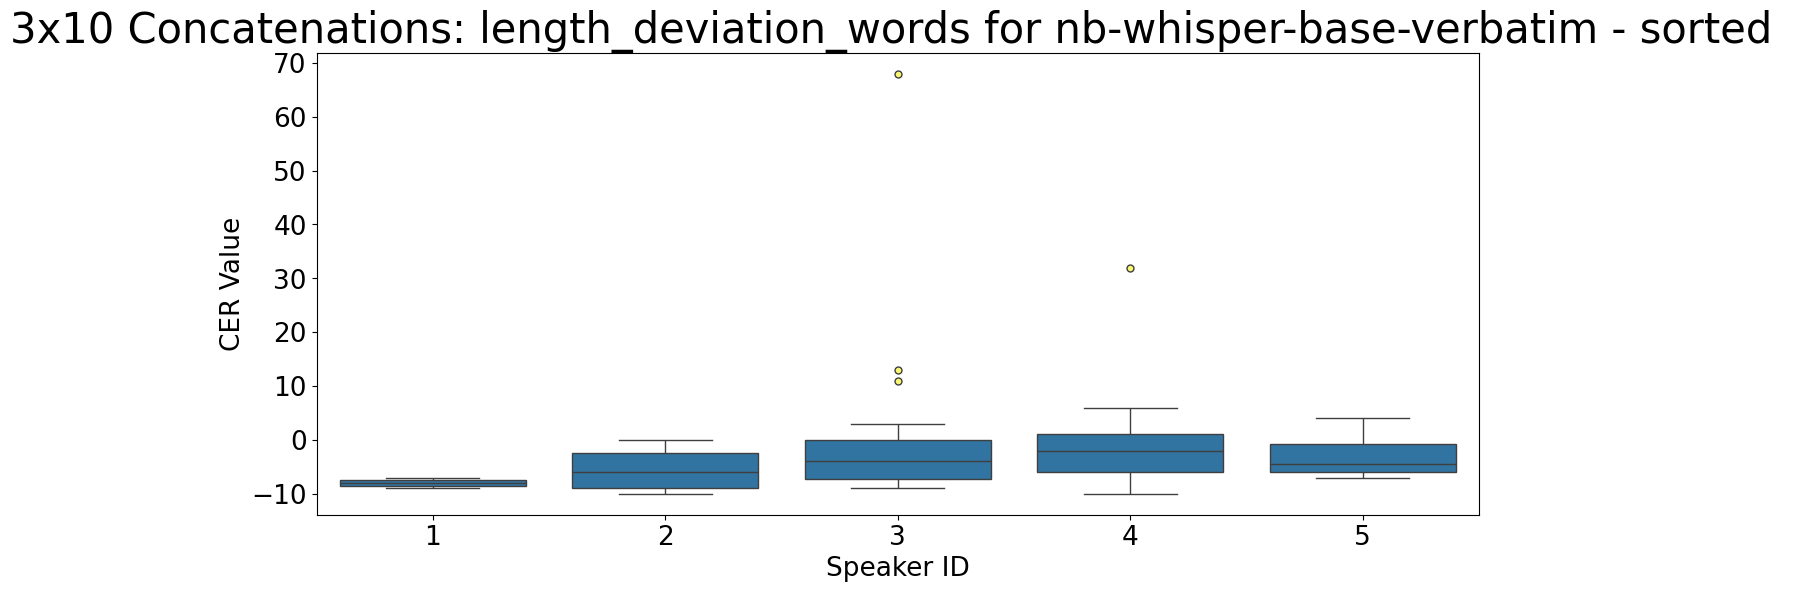

nb-whisper-base-verbatim
nb-whisper-base-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv


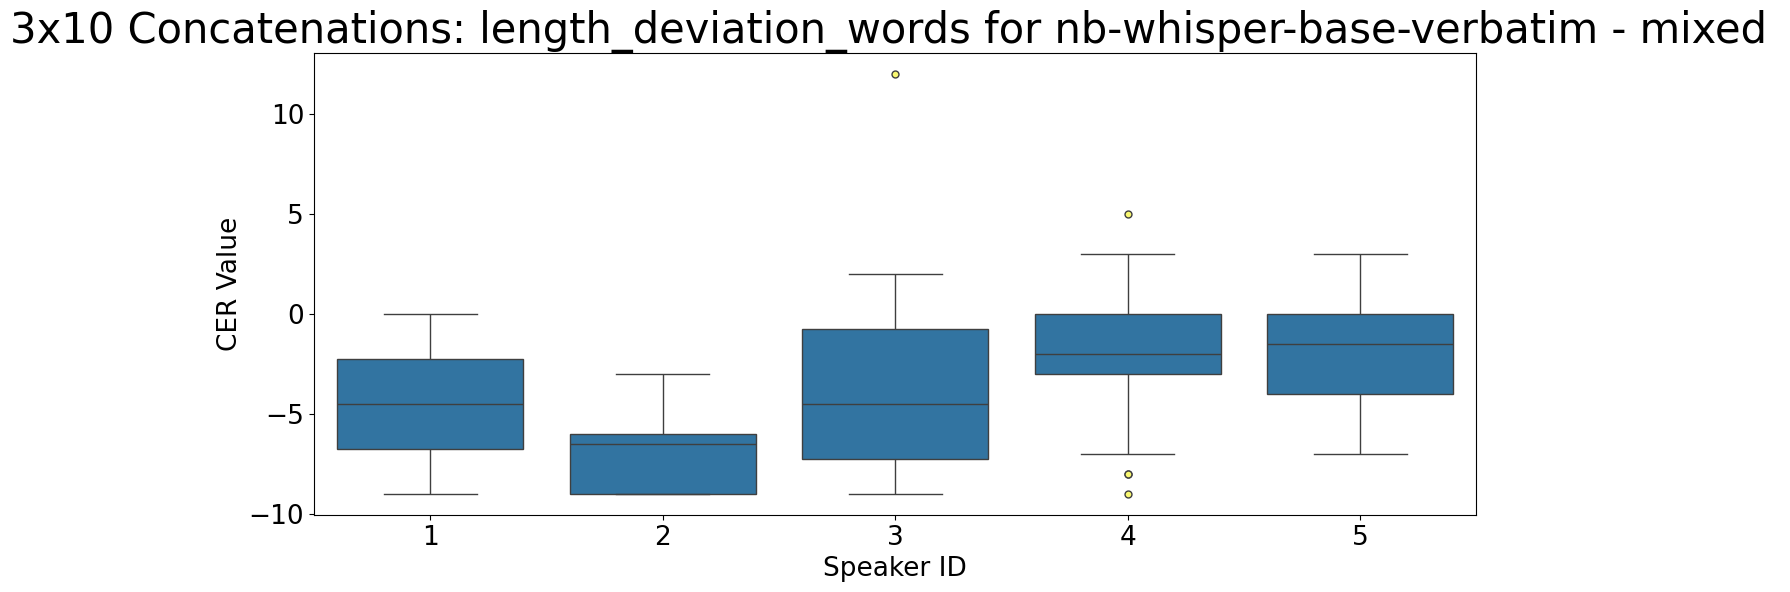

medium
medium__concatenated_audio_information_scores_id_sorted_v1.csv


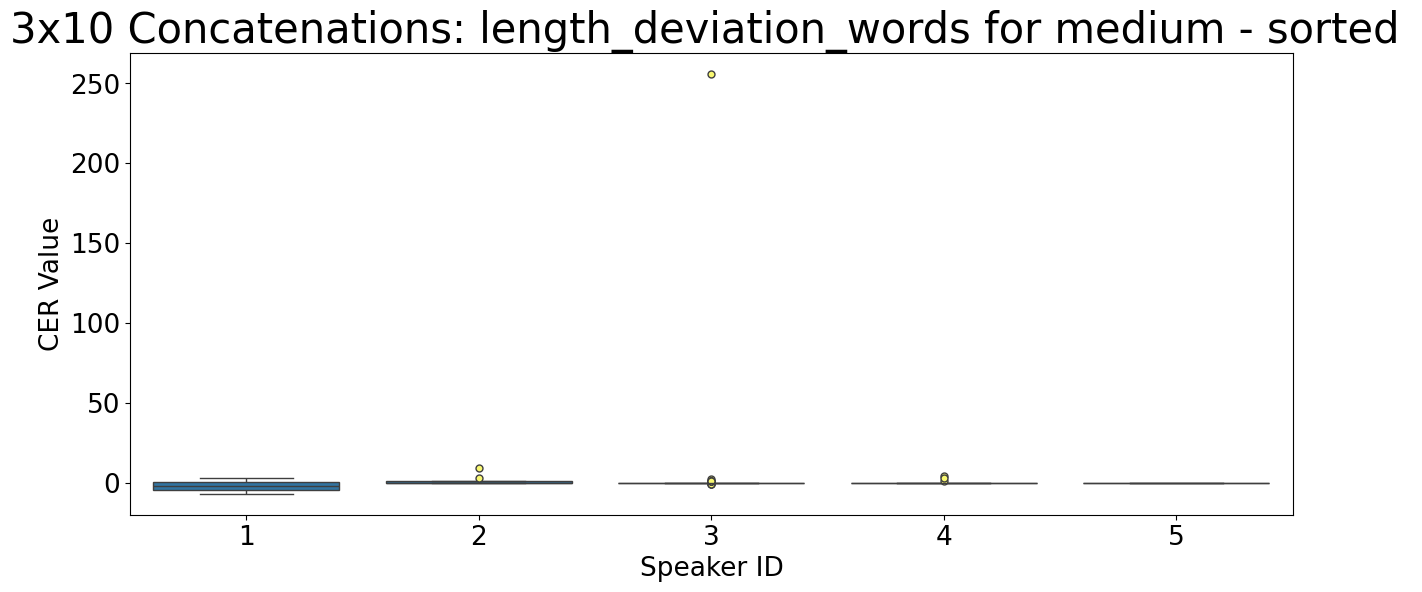

medium
medium__concatenated_audio_information_scores_id_mixed_v1.csv


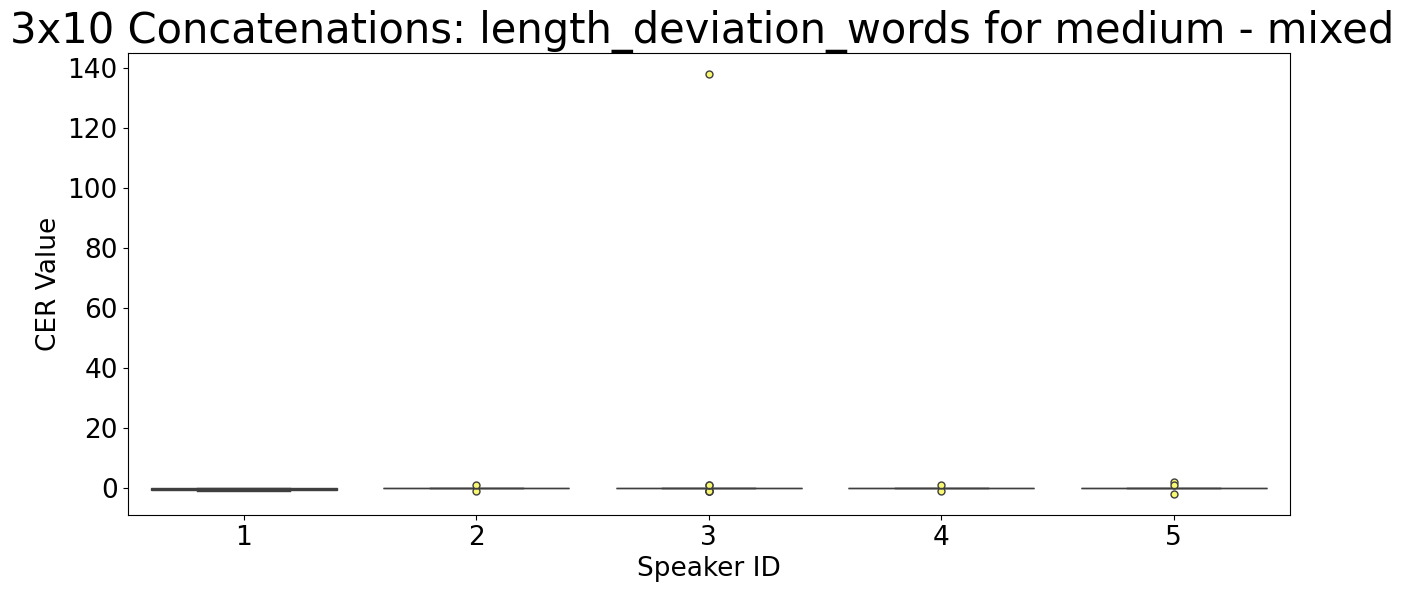

nb-whisper-medium
nb-whisper-medium__concatenated_audio_information_scores_id_sorted_v1.csv


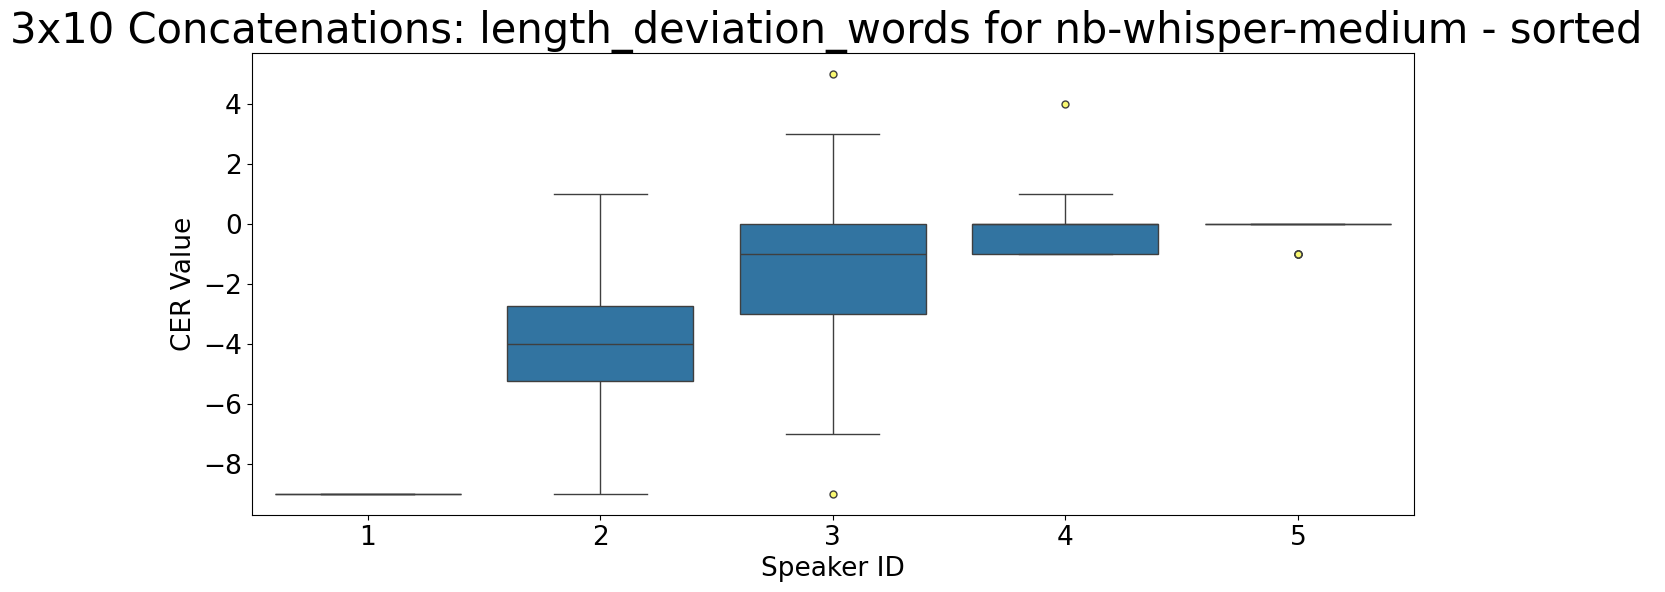

nb-whisper-medium
nb-whisper-medium__concatenated_audio_information_scores_id_mixed_v1.csv


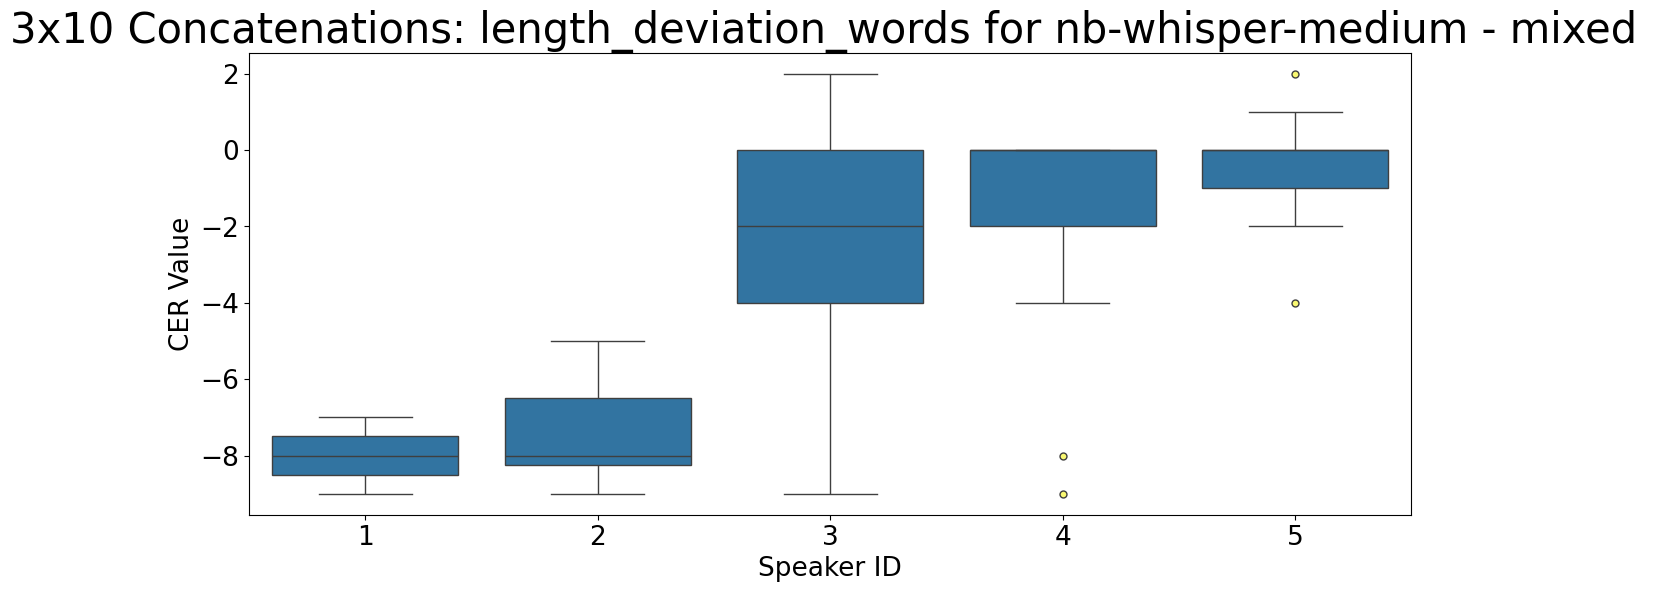

nb-whisper-medium-verbatim
nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv


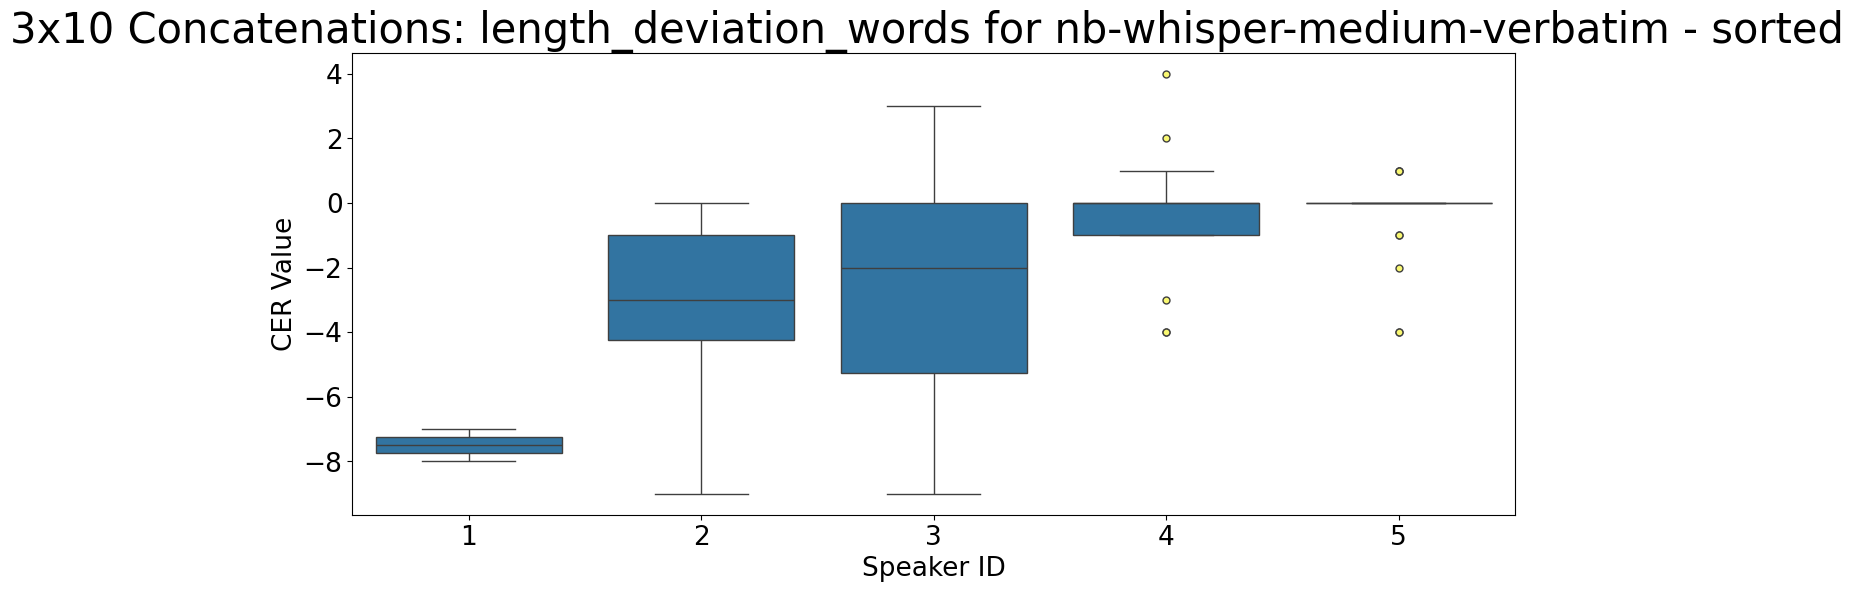

nb-whisper-medium-verbatim
nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv


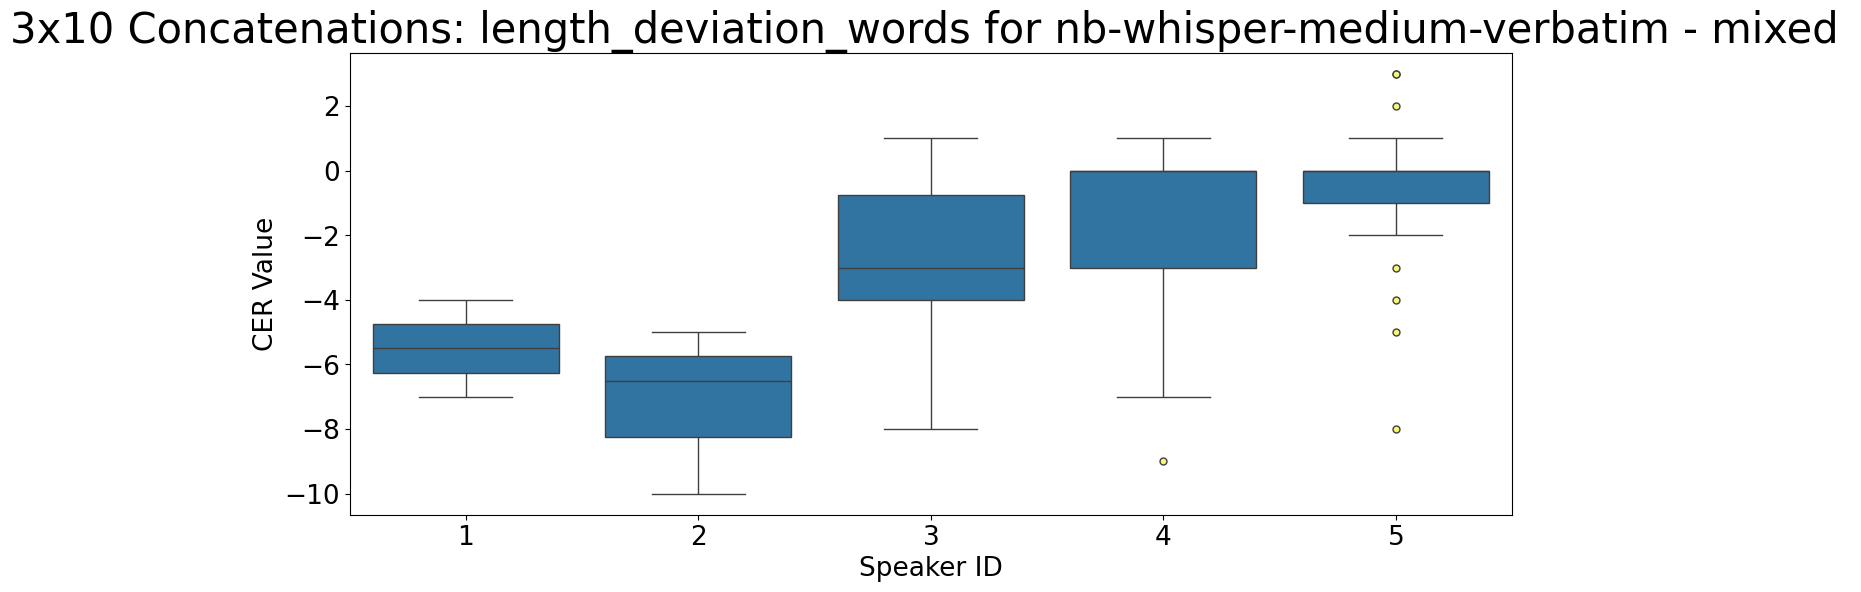

In [116]:
information_dir = './3x10_Concatenation_information'
lst_3x10 = os.listdir(information_dir)
lst_3x10 = [file for file in lst_3x10 if file.endswith('v1.csv')]
lst_model_name = [name.split('_')[1] for name in lst_csv]

models = ['tiny', 'nb-whisper-tiny', 'nb-whisper-tiny-verbatim',
        'base', 'nb-whisper-base', 'nb-whisper-base-verbatim',
        'medium', 'nb-whisper-medium', 'nb-whisper-medium-verbatim']

lst_3x10.sort(key=lambda s: models.index(s.split('__')[0]))

lst_scores_id_sorted = [file for file in lst_3x10 if file.endswith('scores_id_sorted_v1.csv')]
lst_scores_id_mixed = [file for file in lst_3x10 if file.endswith('scores_id_mixed_v1.csv')]
lst_no_group_mixed = [file for file in lst_3x10 if file.endswith('no_group_mixed_v1.csv')]
lst_group_id_sorted_score = [file for file in lst_3x10 if file.endswith('group_id_sorted_score_v1.csv')]


mega_df = pd.DataFrame()

for path in lst_3x10:
        if path.endswith('no_group_mixed_v1.csv') or path.endswith('group_id_sorted_score_v1.csv'):
                continue
        
        df_3x10 = pd.read_csv(os.path.join(information_dir, path))
        model_name = path.split('__')[0]
        
        df_3x10['model_name'] = model_name
        mega_df = pd.concat([mega_df, df_3x10], ignore_index=True)
        
        status = path.split('_')[-2]
        
        print(model_name)
        # # Box plot of length_deviation_words for each model
        print(path)
        plt.figure(figsize=(15, 6))
        sns.boxplot(x='score', y='length_deviation_words', data=df_3x10, # the data parameter
                        # hue='cer_type', palette=['#D65DB1', '#FF9671'], linewidth=1.5, # Set the box colors and line width
                        flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871')) # fill the outliers

        plt.title(f'3x10 Concatenations: length_deviation_words for {model_name} - {status} ', fontsize=30) #,  color=col[1])

        plt.xlabel('Speaker ID', fontsize=19)
        plt.ylabel('CER Value', fontsize=19)
        plt.xticks(fontsize=19)
        plt.yticks(fontsize=19)
        plt.show()
    
    
    # # Box plot for length_deviation_words for one model but all the scores
    # # Box plot for length_deviation_words for one model but 





In [117]:
mega_df.model_name.unique()

array(['tiny', 'nb-whisper-tiny', 'nb-whisper-tiny-verbatim', 'base',
       'nb-whisper-base', 'nb-whisper-base-verbatim', 'medium',
       'nb-whisper-medium', 'nb-whisper-medium-verbatim'], dtype=object)

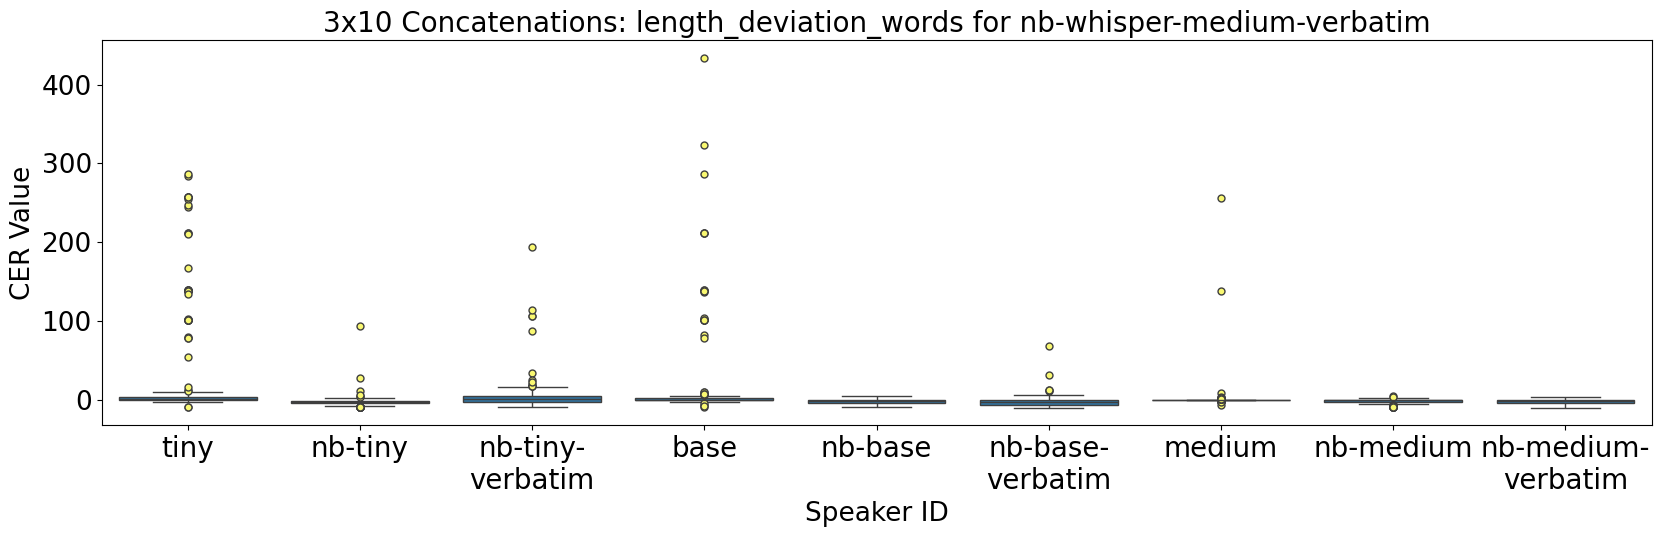

In [109]:
# remove rows whit model name tiny, base and medium
data = mega_df[mega_df['model_name'].str.contains('tiny|base|medium')]

plt.figure(figsize=(20, 5))
sns.boxplot(x='model_name', y='length_deviation_words', data=mega_df, # the data parameter
            # hue='cer_type', palette=['#D65DB1', '#FF9671'], linewidth=1.5, # Set the box colors and line width
            flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871')) # fill the outliers

plt.title(f'3x10 Concatenations: length_deviation_words for {model_name}', fontsize=20) #,  color=col[1])

plt.xlabel('Speaker ID', fontsize=19)
plt.ylabel('CER Value', fontsize=19)
# plt.legend(title='CER Type', loc=loc, title_fontsize='large', fontsize=18)

# Wrap x-axis labels into multiple lines - From ChatGPT 
model_names = [ '\n'.join(wrap(label, 15)) for label in big_boy_df['model_name'].unique() ]
plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=20)
# plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.show()

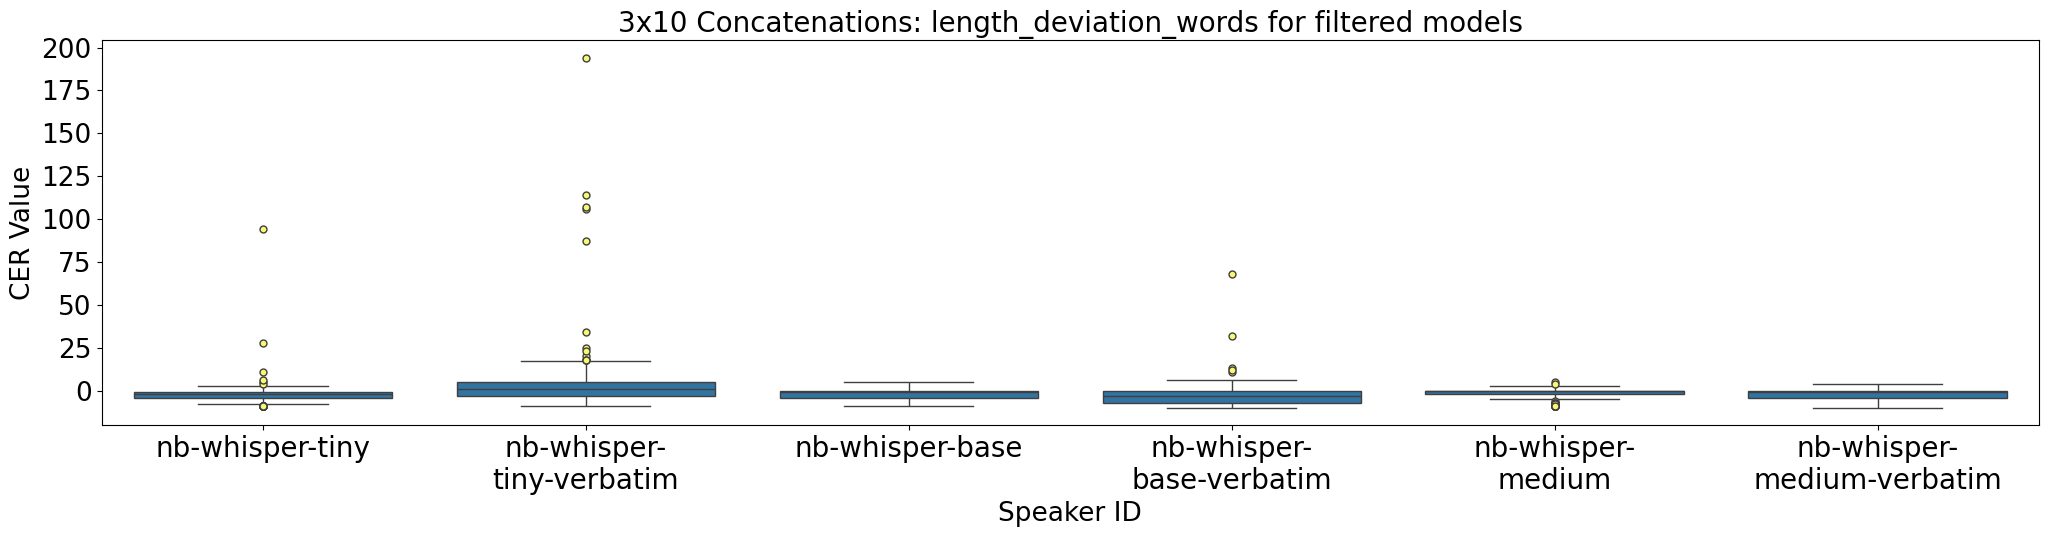

In [122]:
# Filter the dataframe
filtered_mega_df = mega_df[mega_df['model_name'] != 'tiny']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'base']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'medium']

data = filtered_mega_df

# Plotting
plt.figure(figsize=(25, 5))
sns.boxplot(x='model_name', y='length_deviation_words', data=data,
            flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871'))  # fill the outliers

# Setting the title with model_name variable
plt.title('3x10 Concatenations: length_deviation_words for filtered models', fontsize=20)

plt.xlabel('Speaker ID', fontsize=19)
plt.ylabel('CER Value', fontsize=19)

# Wrap x-axis labels into multiple lines
model_names = ['\n'.join(wrap(label, 15)) for label in data['model_name'].unique()]
plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=20)
plt.yticks(fontsize=19)

# Show plot
plt.show()

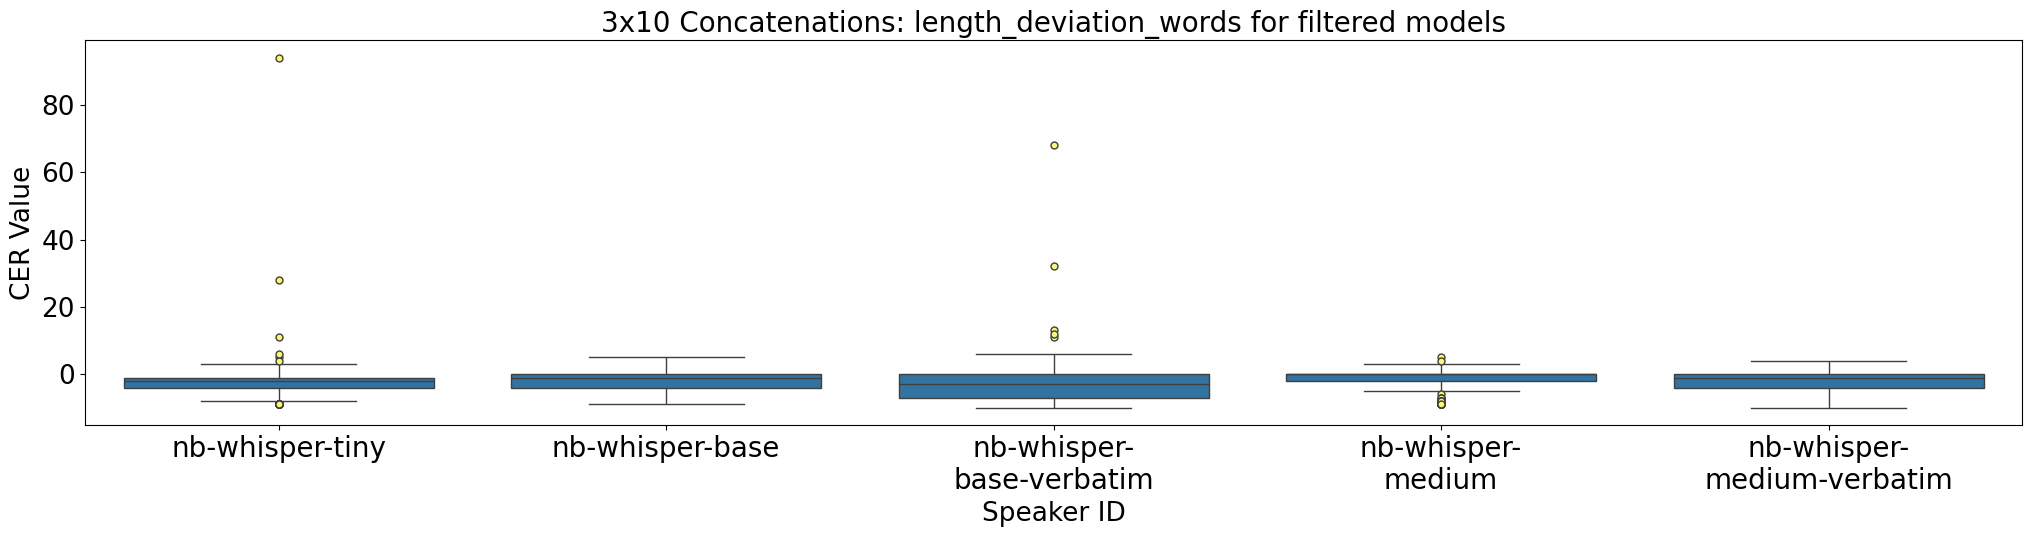

In [123]:
# Filter the dataframe
filtered_mega_df = mega_df[mega_df['model_name'] != 'tiny']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'base']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'medium']
filtered_mega_df = filtered_mega_df[filtered_mega_df['model_name'] != 'nb-whisper-tiny-verbatim']

data = filtered_mega_df

# Plotting
plt.figure(figsize=(25, 5))
sns.boxplot(x='model_name', y='length_deviation_words', data=data,
            flierprops=dict(marker='o', markersize=5, markerfacecolor='#F9F871'))  # fill the outliers

# Setting the title with model_name variable
plt.title('3x10 Concatenations: length_deviation_words for filtered models', fontsize=20)

plt.xlabel('Speaker ID', fontsize=19)
plt.ylabel('CER Value', fontsize=19)

# Wrap x-axis labels into multiple lines
model_names = ['\n'.join(wrap(label, 15)) for label in data['model_name'].unique()]
plt.xticks(ticks=range(len(model_names)), labels=model_names, fontsize=20)
plt.yticks(fontsize=19)

# Show plot
plt.show()

In [129]:
nwmv = 'nb-whisper-medium-verbatim'
nw_m = 'nb-whisper-medium'

nwmv = mega_df[mega_df['model_name'] == nwmv]
nw_m = mega_df[mega_df['model_name'] == nw_m]

# find how many rows has 0 in length_deviation_words
nwmv['length_deviation_words'].value_counts()

length_deviation_words
 0     73
-1     24
-4     16
 1     13
-3     12
-2     12
-7      8
-8      8
-5      7
-9      5
-6      4
 2      3
 3      3
 4      1
-10     1
Name: count, dtype: int64

In [132]:
nwmv['score'][nwmv['length_deviation_words']==0].value_counts()

score
5    39
4    23
3    10
2     1
Name: count, dtype: int64

In [130]:
nw_m['length_deviation_words'].value_counts()

length_deviation_words
 0    88
-1    32
-3    13
-9    11
-2    11
-4     8
 1     8
-8     6
-5     4
-7     3
 2     2
 3     1
 5     1
-6     1
 4     1
Name: count, dtype: int64

In [133]:
nw_m['score'][nw_m['length_deviation_words']==0].value_counts()

score
5    45
4    28
3    15
Name: count, dtype: int64

## <b><span style="color:#FFC75F"> Empty Transcribed files vs. Concatenated Audio </span></b>


<b><span style="color:#ffc75f">ffc75f</span></b>	
<b><span style="color:#ffcc6f">ffcc6f</span></b>	
<b><span style="color:#ffd17f">ffd17f</span></b>	
<b><span style="color:#ffd68f">ffd68f</span></b>	
<b><span style="color:#ffdb9f">ffdb9f</span></b>	
<b><span style="color:#ffe0af">ffe0af</span></b>	
<b><span style="color:#ffe5bf">ffe5bf</span></b>


## <b><span style="color:#F9F871">F9F871</span></b> 

<b><span style="color:#f9f871">f9f871</span></b>	
<b><span style="color:#faf97f">faf97f</span></b>	
<b><span style="color:#faf98d">faf98d</span></b>	
<b><span style="color:#fbfa9c">fbfa9c</span></b>	
<b><span style="color:#fbfbaa">fbfbaa</span></b>	
<b><span style="color:#fcfcb8">fcfcb8</span></b>	
<b><span style="color:#fdfcc6">fdfcc6</span></b>

In [ ]:
data_path = './Transcriptions/Metrics_results/metrics_nb-whisper-base-verbatim_v1.csv'

def exstract_metrics_from_csv(file_path):
    df = pd.read_csv(file_path)
    # Get total mean
    category = df['Category'].values[:-1]
    df['Category'][5] = 0
    mean_sum = df.loc[5].mean()
    
    directory = './Transcriptions/Metrics_results'
    for i in range(1, 6):
        base_name = f'metric_assesment_score_{category}'
        path = os.path.join(directory, f'{base_name}_{i}.csv')
        if os.path.exists(path):
            metric_df = pd.read_csv(path)

        else:
            metric_df = pd.DataFrame(columns=['Model', 'Total_mean', 
                                            'Recall', 'Precision', 'Accuracy'])
        
        new_metric = pd.DataFrame(columns=metric_df.columns)
        new_metric['Model'] = file_path.split('/')[-1].split('.')[0].split('s_')[1]
        new_metric['Total_mean'] = mean_sum
        
        

        # get_new_csv_name(directory,base_name)
        cvs_name = smf.get_new_csv_name(directory,base_name)
    
    # mean_precision = df[df['Category']=='Mean']['Precision'].values[0]
    # mean_accuracy = df[df['Category']=='Mean']['Accuracy'].values[0]
    # mean_recall = df[df['Category']=='Mean']['Recall'].values[0]
    # # mean_f1 = df[df['Category']=='Mean']['F1'].values[0]    
    # total_mean = (mean_precision+mean_accuracy+mean_recall)/3
    
    print(category)
    print(mean_sum)
    print(df)
    # print(row_sums)
    # print(mean)
    
    
    return category # ,precision,recall,accuracy


exstract_metrics_from_csv(data_path)

['1' '2' '3' '4' '5']
0.347475
  Category  Precision  Recall  Accuracy
0        1     0.0641  0.6809    0.8432
1        2     0.1688  0.3145    0.8066
2        3     0.3894  0.2057    0.6661
3        4     0.2662  0.1855    0.6589
4        5     0.5169  0.5128    0.6696
5        0     0.2811  0.3799    0.7289


/tmp/ipykernel_3017325/108811244.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Category'][5] = 0
/tmp/ipykernel_3017325/108811244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

array(['1', '2', '3', '4', '5'], dtype=object)

In [ ]:
# met_df = smf.metrics_from_csv('./Transcriptions/Metrics_results/metrics_medium_v1.csv')
 
# def get_sorted_results(score, metric_dir = './Transcriptions/Metrics_results/')

mega_matrix = pd.DataFrame(columns=['Model', 'Version', 'Total_mean',  
                                'Recall', 'Precision', 'Accuracy'])
# Find all the metric data
metric_dir = './Transcriptions/Metrics_results/'
metric_list = os.listdir(metric_dir)
metric_list = [metric for metric in metric_list if metric.endswith('.csv')]

for metric in metric_list:
    csv_file = os.path.join(metric_dir, metric)
    metrics = pd.read_csv(csv_file)
    # Find teh modelname and version
    metrics['Model'] = metric.split('_')[1].split('.')[0]
    metrics['Version'] = metric.split('_')[2].split('.')[0]
    
    # Calculate total mean
    mean_precision = metrics[metrics['Category']=='Mean']['Precision'].values[0]
    mean_recall = metrics[metrics['Category']=='Mean']['Recall'].values[0]
    mean_accuracy = metrics[metrics['Category']=='Mean']['Accuracy'].values[0]
    total_mean = np.round((mean_precision + mean_recall + mean_accuracy) / 3,4)
    metrics['Total_mean'] = total_mean
    
    metrics['Category'] = metrics.drop(metrics[metrics['Category']=='Mean'].index)
    
    
    mega_matrix = pd.concat([mega_matrix, metrics], ignore_index=True)

ValueError: Columns must be same length as key

In [ ]:
mega_matrix
# metric_listed = ['Precision', 'Recall',  'Accuracy',  'Total_mean']
# for met in metric_listed:
#     value_1_matrix = mega_matrix[mega_matrix['Category']==1]
#     print(value_1_matrix)
#     # sorted_matrix = value_1_matrix.sort_values(by=met, ascending=False).reset_index(drop=True)
#     # first_three_rows = sorted_matrix.head(3)
#     # rows_as_dicts = first_three_rows.to_dict('records')
#     # print(rows_as_dicts)
#     break


# # Sort mega_matrix by 'Total_mean' in descending order and reset index
# # mega_matrix_grouped = mega_matrix_dropped.groupby('Category')

# # mega_matrix_sorted = mega_matrix.sort_values(by='Total_mean', ascending=False).reset_index(drop=True)

# # # Drop rows where 'Category' is 'Mean'
# # mega_matrix_dropped = mega_matrix_sorted.drop(mega_matrix_sorted[mega_matrix_sorted['Category'] == 'Mean'].index)

# # Group the DataFrame by 'Category'

# # Print the groups dictionary

# # for name, group in mega_matrix_grouped:
# #     group = sorted(group, key='Total_mean')
# #     print(group.sor)
    
#     # print(f"\nCategory: {name}")
#     # print(group)
#     # filename = f"{name}.csv"  # Create a unique filename for each group
#     # group.to_csv(filename, index=False)

,Category,Precision,Recall,Accuracy,Total_mean,Model,Version
0,1,0.0390,0.7105,0.7099,0.3900,tiny,v1
1,2,0.0831,0.3007,0.6518,0.3900,tiny,v1
2,3,0.2979,0.2262,0.6094,0.3900,tiny,v1
3,4,0.3043,0.1415,0.6962,0.3900,tiny,v1
4,5,0.3825,0.0481,0.6488,0.3900,tiny,v1
...,...,...,...,...,...,...,...
67,2,0.2131,0.2946,0.8445,0.4789,nb-whisper-medium-verbatim,v2
68,3,0.4328,0.1698,0.6853,0.4789,nb-whisper-medium-verbatim,v2
69,4,0.2482,0.1403,0.6698,0.4789,nb-whisper-medium-verbatim,v2
70,5,0.4922,0.7119,0.6511,0.4789,nb-whisper-medium-verbatim,v2


In [ ]:
import pandas as pd

# Assuming mega_matrix is your DataFrame and it's already grouped by 'Category'

# Function to format the output string for each row
def format_output(row):
    metric_name = row.name[0]  # Get the metric name from the MultiIndex
    model_version = row['Model Version']
    value = row['Total_mean']  # Assuming 'Total_mean' is the relevant metric for your case
    return f"{metric_name} {model_version}: {value}"

# Process each category
output_strings = []
for category, group in mega_matrix.groupby(level=0):  # Grouping by the first level of the MultiIndex (Category)
    # Convert the group to a DataFrame for easier iteration
    group_df = group.reset_index()
    
    # Further process each metric within the category
    for _, row in group_df.iterrows():
        output_string = format_output(row)
        output_strings.append(output_string)

# Join the output strings with a separator if needed
output_text = "\n".join(output_strings)

# Save to a text file
with open('output.txt', 'w') as f:
    f.write(output_text)


TypeError: 'int' object is not subscriptable

In [ ]:



matrix_1 = mega_matrix[mega_matrix['Category'] == '5'].copy()


matri_1 = matrix_1.drop(columns=['Category'])
matrix_1_accuracy = matrix_1.sort_values(by='Accuracy', ascending=False, ignore_index=True)
matrix_1_precision = matrix_1.sort_values(by='Precision', ascending=False, ignore_index=True)
matrix_1_recall = matrix_1.sort_values(by='Recall', ascending=False, ignore_index=True)


categories = [1,2,3,4,5]

mega_metrics_matrix = pd.DataFrame(columns=['Category', 'Model', 'Version', 'Value', 'Best_preformance'])

metric_list = ['Accuracy', 'Precision', 'Recall']

for idx, category in enumerate(categories):
    # matrix = mega_matrix[mega_matrix['Category'] == category].copy()
    for metric in metric_list:
        print(category)
        print(metric)
        # matrix = mega_matrix.loc[mega_matrix['Category'] == category, metric].reset_index(drop=True)
        # matrix = matrix.sort_values( ascending=False, ignore_index=True)
        # # mega_metrics_matrix
        # print(matrix)
        # print(mega_matrix.loc[mega_matrix['Category'] == category])
        break
        
    
    # print(i)


# matrix_2 = mega_matrix[mega_matrix['Category'] == '2']
# matrix_3 = mega_matrix[mega_matrix['Category'] == '3']
# matrix_4 = mega_matrix[mega_matrix['Category'] == '4']
# matrix_5 = mega_matrix[mega_matrix['Category'] == '5']
# print(matrix_1)
# print(matrix_1_accuracy)
# print(matrix_1_precision)
# print(matrix_1_recall)


# File_name -> Best performances of category #number 
# Model name | Version | Value | String (specefying) 





1
Accuracy
2
Accuracy
3
Accuracy
4
Accuracy
5
Accuracy


+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |   0.039   | 0.7105 |  0.7099  |
|    2     |  0.0831   | 0.3007 |  0.6518  |
|    3     |  0.2979   | 0.2262 |  0.6094  |
|    4     |  0.3043   | 0.1415 |  0.6962  |
|    5     |  0.3825   | 0.0481 |  0.6488  |
|   Mean   |  0.2214   | 0.2854 |  0.6632  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0390,0.7105,0.7099
1,2,0.0831,0.3007,0.6518
2,3,0.2979,0.2262,0.6094
3,4,0.3043,0.1415,0.6962
4,5,0.3825,0.0481,0.6488
5,Mean,0.2214,0.2854,0.6632


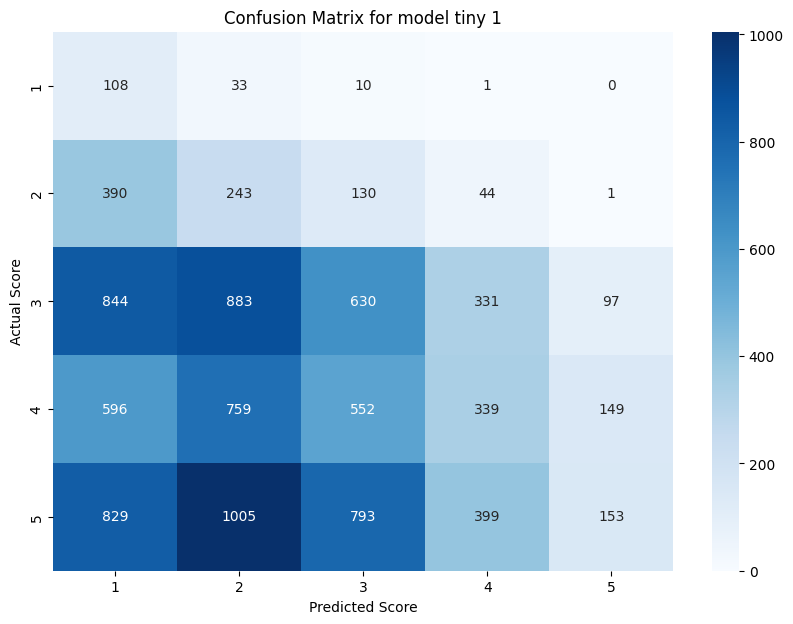

Confusion Matrix:
 [[ 108   33   10    1    0]
 [ 390  243  130   44    1]
 [ 844  883  630  331   97]
 [ 596  759  552  339  149]
 [ 829 1005  793  399  153]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0434   | 0.6954 |  0.7465  |
|    2     |  0.0989   | 0.3185 |  0.6897  |
|    3     |  0.2999   | 0.2234 |  0.6121  |
|    4     |  0.2948   | 0.1724 |  0.6812  |
|    5     |  0.4185   | 0.1082 |  0.6444  |
|   Mean   |  0.2311   | 0.3036 |  0.6748  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0434,0.6954,0.7465
1,2,0.0989,0.3185,0.6897
2,3,0.2999,0.2234,0.6121
3,4,0.2948,0.1724,0.6812
4,5,0.4185,0.1082,0.6444
5,Mean,0.2311,0.3036,0.6748


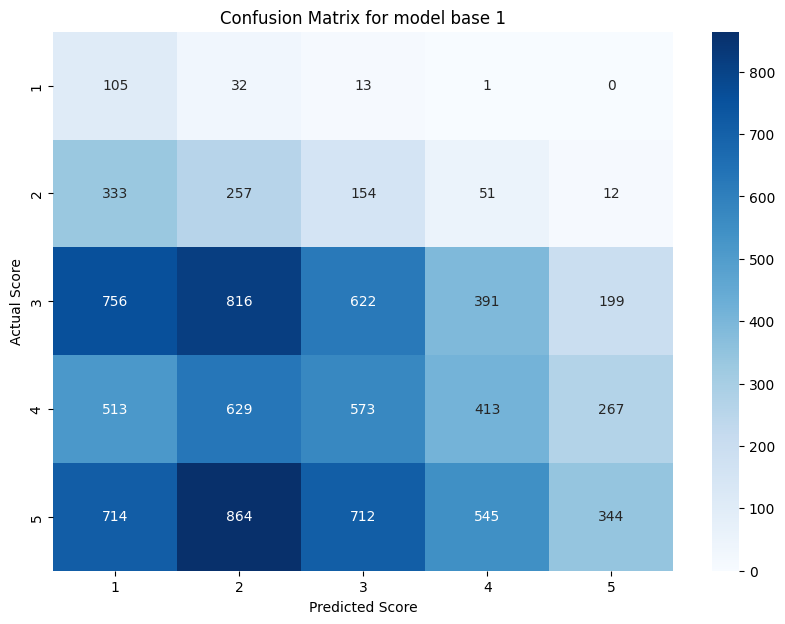

Confusion Matrix:
 [[105  32  13   1   0]
 [333 257 154  51  12]
 [756 816 622 391 199]
 [513 629 573 413 267]
 [714 864 712 545 344]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0521   | 0.6447 |  0.803   |
|    2     |  0.1187   | 0.2809 |  0.7567  |
|    3     |  0.3335   | 0.2136 |  0.6374  |
|    4     |  0.2886   |  0.22  |  0.6602  |
|    5     |  0.4849   | 0.2922 |  0.6526  |
|   Mean   |  0.2556   | 0.3303 |  0.702   |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0521,0.6447,0.8030
1,2,0.1187,0.2809,0.7567
2,3,0.3335,0.2136,0.6374
3,4,0.2886,0.2200,0.6602
4,5,0.4849,0.2922,0.6526
5,Mean,0.2556,0.3303,0.7020


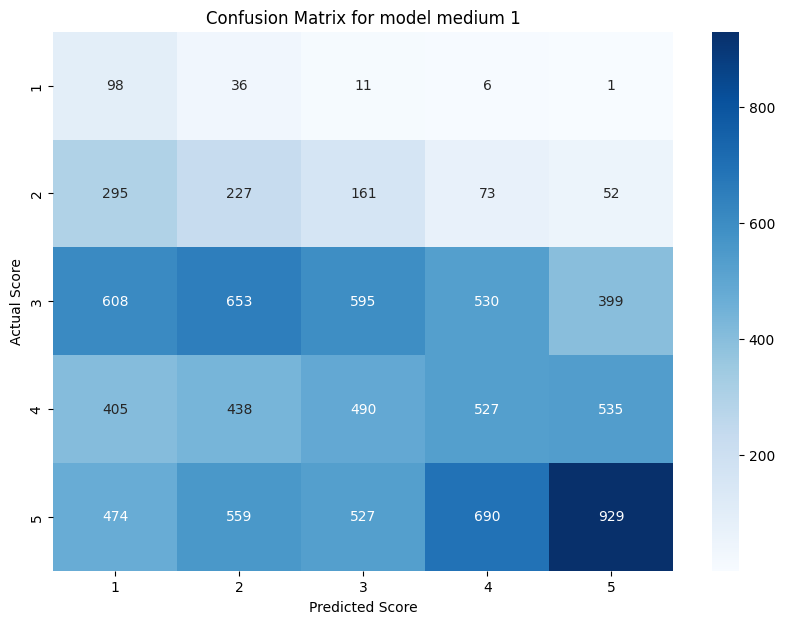

Confusion Matrix:
 [[ 98  36  11   6   1]
 [295 227 161  73  52]
 [608 653 595 530 399]
 [405 438 490 527 535]
 [474 559 527 690 929]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0634   | 0.7237 |  0.821   |
|    2     |  0.1505   | 0.2871 |  0.7976  |
|    3     |  0.3718   | 0.1853 |  0.6629  |
|    4     |  0.2639   | 0.1662 |  0.6666  |
|    5     |  0.5272   | 0.5215 |  0.6772  |
|   Mean   |  0.2754   | 0.3768 |  0.7251  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0634,0.7237,0.8210
1,2,0.1505,0.2871,0.7976
2,3,0.3718,0.1853,0.6629
3,4,0.2639,0.1662,0.6666
4,5,0.5272,0.5215,0.6772
5,Mean,0.2754,0.3768,0.7251


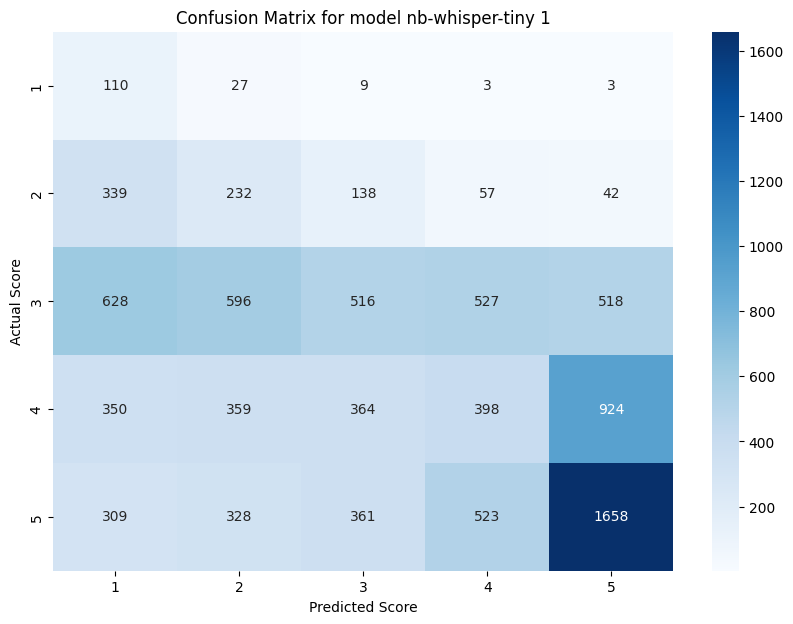

Confusion Matrix:
 [[ 110   27    9    3    3]
 [ 339  232  138   57   42]
 [ 628  596  516  527  518]
 [ 350  359  364  398  924]
 [ 309  328  361  523 1658]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0781   | 0.7007 |  0.8644  |
|    2     |  0.1824   | 0.2984 |  0.8241  |
|    3     |  0.4076   | 0.1805 |  0.6765  |
|    4     |  0.2642   | 0.1679 |  0.6656  |
|    5     |  0.5147   | 0.6345 |  0.6708  |
|   Mean   |  0.2894   | 0.3964 |  0.7403  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0781,0.7007,0.8644
1,2,0.1824,0.2984,0.8241
2,3,0.4076,0.1805,0.6765
3,4,0.2642,0.1679,0.6656
4,5,0.5147,0.6345,0.6708
5,Mean,0.2894,0.3964,0.7403


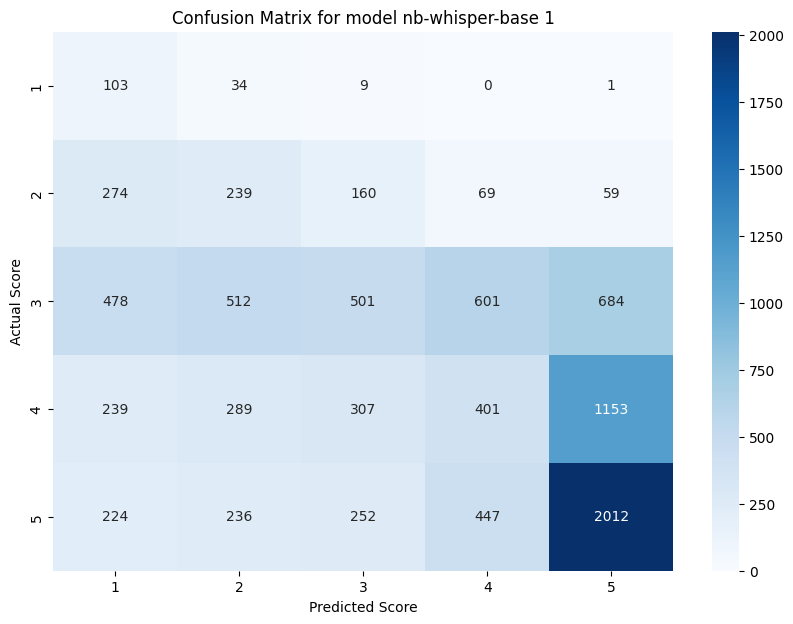

Confusion Matrix:
 [[ 103   34    9    0    1]
 [ 274  239  160   69   59]
 [ 478  512  501  601  684]
 [ 239  289  307  401 1153]
 [ 224  236  252  447 2012]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0902   | 0.6284 |  0.8932  |
|    2     |  0.2193   | 0.2848 |  0.8505  |
|    3     |  0.4734   | 0.1763 |  0.6951  |
|    4     |  0.2659   | 0.1485 |  0.6756  |
|    5     |  0.4942   | 0.7552 |  0.6525  |
|   Mean   |  0.3086   | 0.3986 |  0.7534  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0902,0.6284,0.8932
1,2,0.2193,0.2848,0.8505
2,3,0.4734,0.1763,0.6951
3,4,0.2659,0.1485,0.6756
4,5,0.4942,0.7552,0.6525
5,Mean,0.3086,0.3986,0.7534


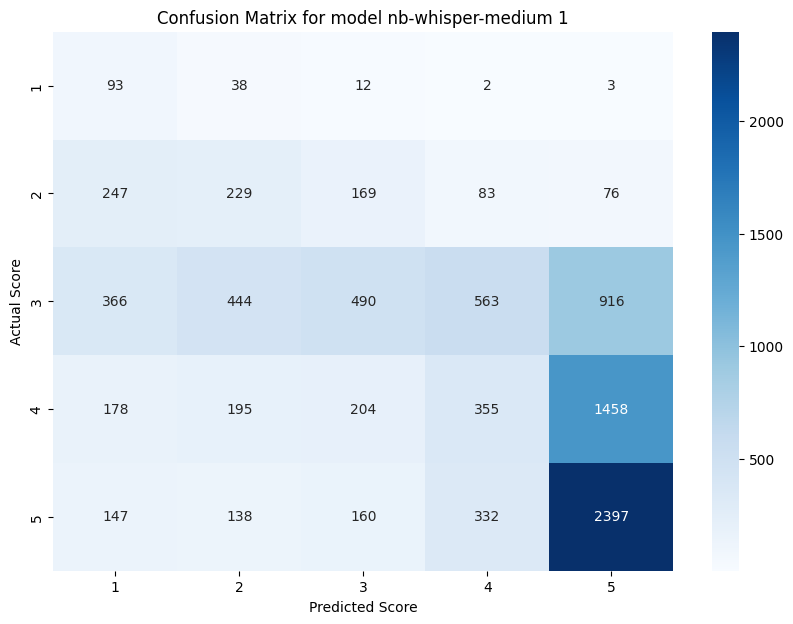

Confusion Matrix:
 [[  93   38   12    2    3]
 [ 247  229  169   83   76]
 [ 366  444  490  563  916]
 [ 178  195  204  355 1458]
 [ 147  138  160  332 2397]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0641   | 0.6809 |  0.8432  |
|    2     |  0.1688   | 0.3145 |  0.8066  |
|    3     |  0.3894   | 0.2057 |  0.6661  |
|    4     |  0.2662   | 0.1855 |  0.6589  |
|    5     |  0.5169   | 0.5128 |  0.6696  |
|   Mean   |  0.2811   | 0.3799 |  0.7289  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0641,0.6809,0.8432
1,2,0.1688,0.3145,0.8066
2,3,0.3894,0.2057,0.6661
3,4,0.2662,0.1855,0.6589
4,5,0.5169,0.5128,0.6696
5,Mean,0.2811,0.3799,0.7289


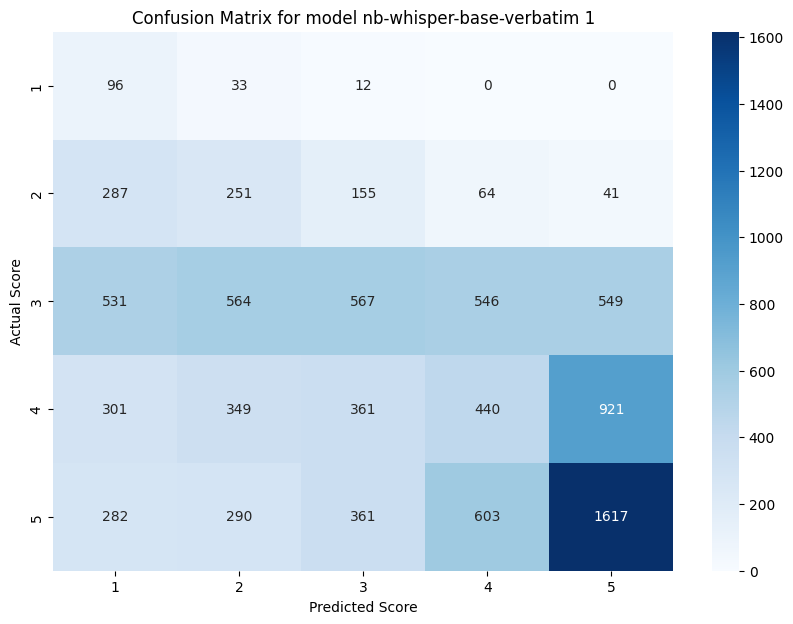

Confusion Matrix:
 [[  96   33   12    0    0]
 [ 287  251  155   64   41]
 [ 531  564  567  546  549]
 [ 301  349  361  440  921]
 [ 282  290  361  603 1617]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0865   | 0.6623 |  0.8812  |
|    2     |  0.2131   | 0.2946 |  0.8445  |
|    3     |  0.4328   | 0.1698 |  0.6853  |
|    4     |  0.2482   | 0.1403 |  0.6698  |
|    5     |  0.4922   | 0.7119 |  0.6511  |
|   Mean   |  0.2946   | 0.3958 |  0.7464  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0865,0.6623,0.8812
1,2,0.2131,0.2946,0.8445
2,3,0.4328,0.1698,0.6853
3,4,0.2482,0.1403,0.6698
4,5,0.4922,0.7119,0.6511
5,Mean,0.2946,0.3958,0.7464


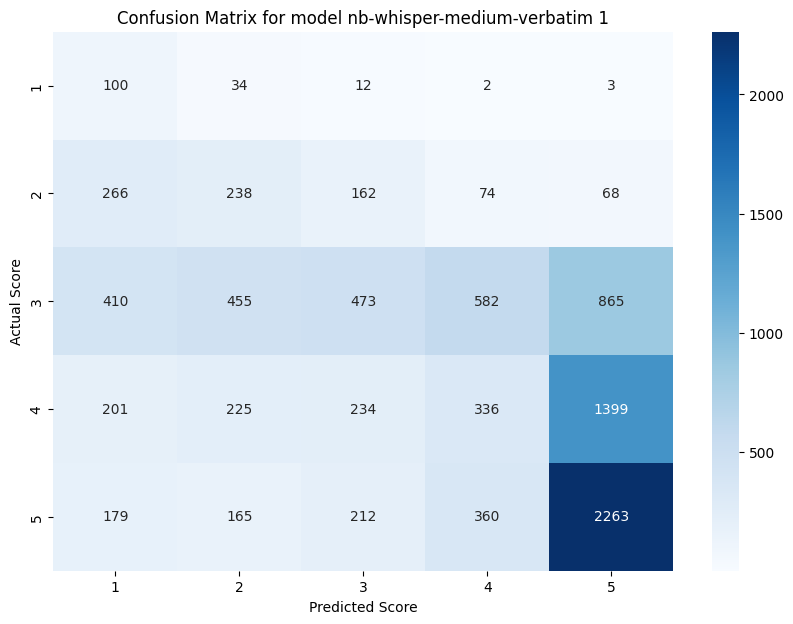

Confusion Matrix:
 [[ 100   34   12    2    3]
 [ 266  238  162   74   68]
 [ 410  455  473  582  865]
 [ 201  225  234  336 1399]
 [ 179  165  212  360 2263]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0638   | 0.7566 |  0.8149  |
|    2     |  0.1394   | 0.2983 |  0.7795  |
|    3     |  0.3455   | 0.1968 |  0.6486  |
|    4     |  0.2877   | 0.1791 |  0.6751  |
|    5     |  0.5214   | 0.4445 |  0.6713  |
|   Mean   |  0.2716   | 0.3751 |  0.7179  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0638,0.7566,0.8149
1,2,0.1394,0.2983,0.7795
2,3,0.3455,0.1968,0.6486
3,4,0.2877,0.1791,0.6751
4,5,0.5214,0.4445,0.6713
5,Mean,0.2716,0.3751,0.7179


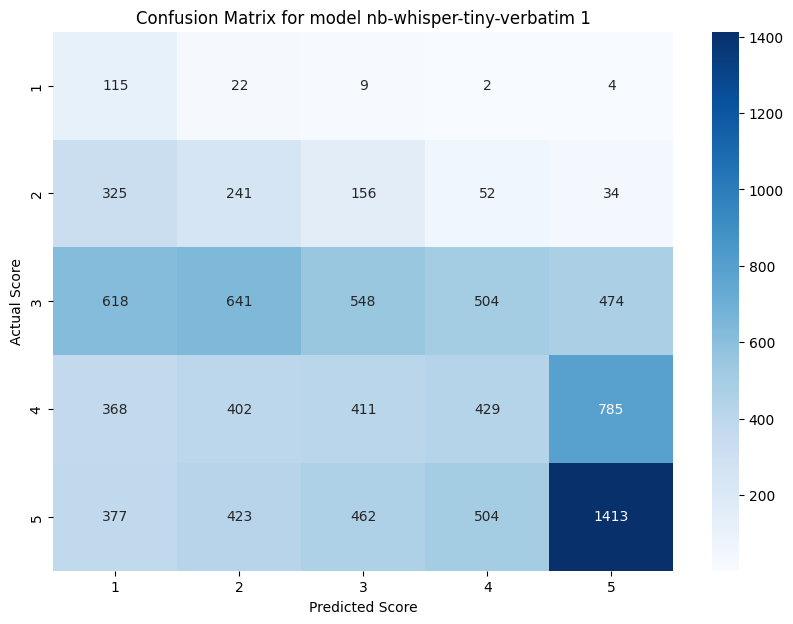

Confusion Matrix:
 [[ 115   22    9    2    4]
 [ 325  241  156   52   34]
 [ 618  641  548  504  474]
 [ 368  402  411  429  785]
 [ 377  423  462  504 1413]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0638   | 0.7566 |  0.8149  |
|    2     |  0.1394   | 0.2983 |  0.7795  |
|    3     |  0.3455   | 0.1968 |  0.6486  |
|    4     |  0.2877   | 0.1791 |  0.6751  |
|    5     |  0.5214   | 0.4445 |  0.6713  |
|   Mean   |  0.2716   | 0.3751 |  0.7179  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0638,0.7566,0.8149
1,2,0.1394,0.2983,0.7795
2,3,0.3455,0.1968,0.6486
3,4,0.2877,0.1791,0.6751
4,5,0.5214,0.4445,0.6713
5,Mean,0.2716,0.3751,0.7179


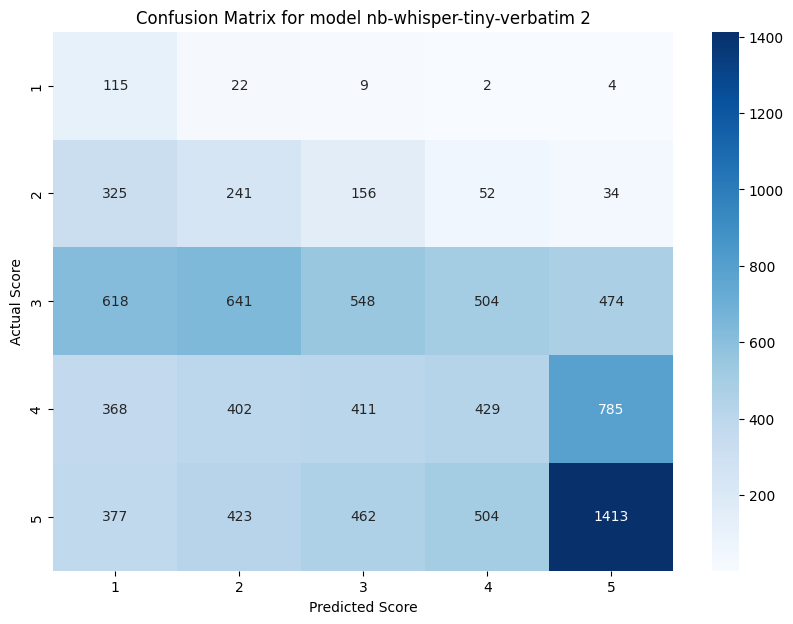

Confusion Matrix:
 [[ 115   22    9    2    4]
 [ 325  241  156   52   34]
 [ 618  641  548  504  474]
 [ 368  402  411  429  785]
 [ 377  423  462  504 1413]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0641   | 0.6809 |  0.8432  |
|    2     |  0.1688   | 0.3145 |  0.8066  |
|    3     |  0.3894   | 0.2057 |  0.6661  |
|    4     |  0.2662   | 0.1855 |  0.6589  |
|    5     |  0.5169   | 0.5128 |  0.6696  |
|   Mean   |  0.2811   | 0.3799 |  0.7289  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0641,0.6809,0.8432
1,2,0.1688,0.3145,0.8066
2,3,0.3894,0.2057,0.6661
3,4,0.2662,0.1855,0.6589
4,5,0.5169,0.5128,0.6696
5,Mean,0.2811,0.3799,0.7289


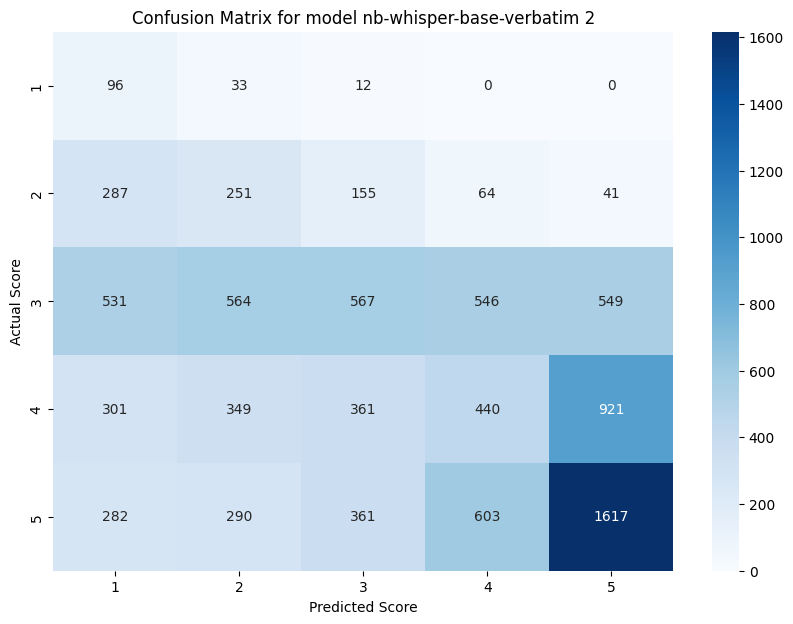

Confusion Matrix:
 [[  96   33   12    0    0]
 [ 287  251  155   64   41]
 [ 531  564  567  546  549]
 [ 301  349  361  440  921]
 [ 282  290  361  603 1617]]
+----------+-----------+--------+----------+
| Category | Precision | Recall | Accuracy |
+----------+-----------+--------+----------+
|    1     |  0.0865   | 0.6623 |  0.8812  |
|    2     |  0.2131   | 0.2946 |  0.8445  |
|    3     |  0.4328   | 0.1698 |  0.6853  |
|    4     |  0.2482   | 0.1403 |  0.6698  |
|    5     |  0.4922   | 0.7119 |  0.6511  |
|   Mean   |  0.2946   | 0.3958 |  0.7464  |
+----------+-----------+--------+----------+


,Category,Precision,Recall,Accuracy
0,1,0.0865,0.6623,0.8812
1,2,0.2131,0.2946,0.8445
2,3,0.4328,0.1698,0.6853
3,4,0.2482,0.1403,0.6698
4,5,0.4922,0.7119,0.6511
5,Mean,0.2946,0.3958,0.7464


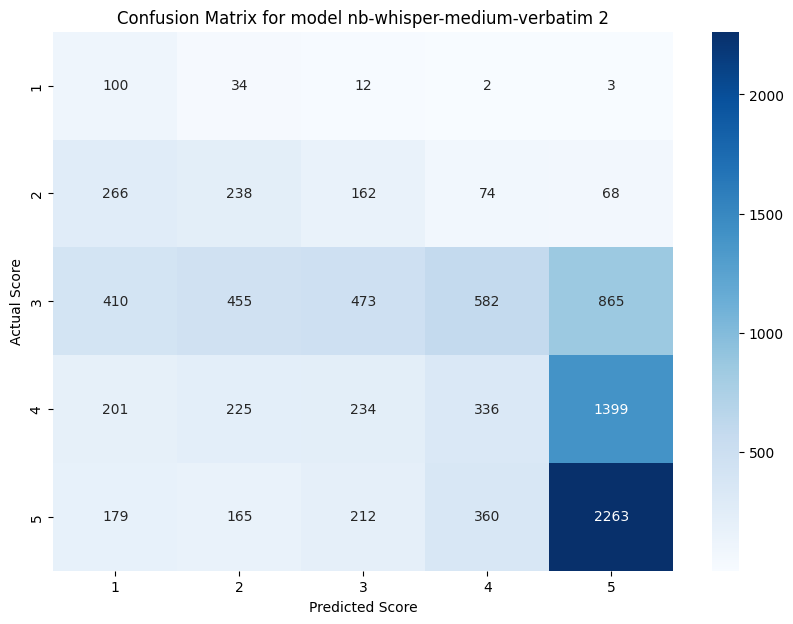

Confusion Matrix:
 [[ 100   34   12    2    3]
 [ 266  238  162   74   68]
 [ 410  455  473  582  865]
 [ 201  225  234  336 1399]
 [ 179  165  212  360 2263]]


In [ ]:

save = False

empty_transcription_path = './Transcriptions/Empty_Transcriptions/'
directory = './Transcriptions'

dir_list =  os.listdir(directory)
for file in dir_list:
    if file.startswith('trans') and file.endswith('.csv'):
        model_name = file.split('_')[1]
        version = file.split('_v')[1].split('.c')[0]
        df = pd.read_csv(os.path.join(directory, file))
        word_score = df['OG Score']
        cer_score = df['CER Score']
        
        smf.accuracy_precision_recall(word_score=word_score, cer_score=cer_score, name=model_name, 
                                    version=version, save=save, 
                                    directory='./Transcriptions/Metrics_results')
        
        smf.conf_matrix(word_score=word_score, cer_score=cer_score, 
                        name=model_name, version=version, save=save, plot=True,
                        directory='./Transcriptions/Confution_matrix')